# Extracting Social behaviour from text using LIWC results

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from scipy import stats

In [3]:
################### Google Trend ################################
!pip install pytrends

# Fake And Real






In [ ]:
Australia_fake = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (Australia_tweet_fake).xlsx')
Australia_real = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (Australia_tweet_real).xlsx')
Singapour_fake = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (Singapore_tweet_fake).xlsx')
Singapour_real = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (Singapore_tweet_real).xlsx')
SouthKorea_fake = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (SouthKorea_tweet_fake).xlsx')
SouthKorea_real = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (SouthKorea_tweet_real).xlsx')
UK_fake = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (UK_tweet_fake).xlsx')
UK_real = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (UK_tweet_real).xlsx')
USA_fake = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (USA_tweet_fake).xlsx')
USA_real = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/3- Fake and real news detections+LIWC/LIWC2015 Results (USA_tweet_real).xlsx')

In [ ]:
Australia_fake_SEANCE = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_Australia_fake.csv')
Australia_real_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_Australia_true.csv')
Singapour_fake_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_Singapor_fake.csv')
Singapour_real_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_Singapor_true.csv')
SouthKorea_fake_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_South_korea_fake.csv')
SouthKorea_real_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_South_korea_true.csv')
UK_fake_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_UK_fake.csv')
UK_real_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_UK_real.csv')
USA_fake_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_USA_fake.csv')
USA_real_SEANCE  = pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/4_ SEntiment ANalysis and Congnition Engine/results_USA_true.csv')

In [ ]:
from scipy.optimize import curve_fit
def  Delete_last_row(DD):
   for i in range(len(DD)):
            if DD[i].shape[0]==10: 
                    DD[i].drop(DD[i].tail(1).index,inplace=True)
   return DD


############### Fitting Cureve
def func_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def func_Gaussian(x,a1,b1,c1,a2,b2,c2):
    return a1*np.exp(-((x-b1)/c1)**2) + a2*np.exp(-((x-b2)/c2)**2)

def func_Polynomial(x,p1,p2,p3):
    return  p1*np.power(x,2)  + (p2*x) + p3

def func_Power(x,a,b,c):
    return  a*(x**b)+c

def func_Rational(x,p1,p2,p3,q1,q2,q3):
    return  (p1*np.power(x,2) + (p2*x) + p3) /(np.power(x,3)  + q1*np.power(x,2)  + (q2*x) + q3)

def func_sine(x,a1,b1,c1):
    return a1*np.sin(b1*x+c1)

def func_Weibull(x,a,b):
    return a*b* (x**(b-1))*np.exp(-a*(x**b))
Fitting_Cureve_function=[func_exp,func_Gaussian,func_Polynomial,func_Power,func_Rational,func_sine,func_Weibull]


https://ourworldindata.org/covid-deaths

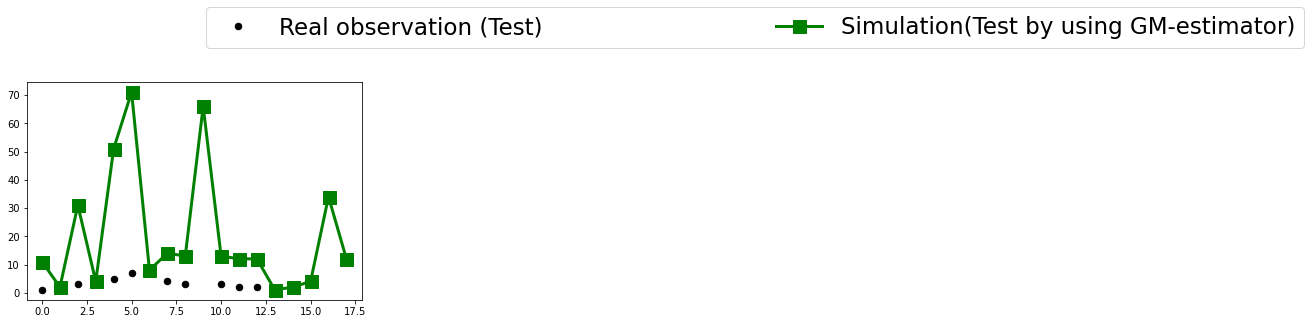

In [ ]:
X=[1,2,3,4,5,7,8,4,3,66,3,2,2,1,2,4,34,12]
Y=[11,2,31,4,51,71,8,14,13,66,13,12,12,1,2,4,34,12]
plt.plot(X,'k.',markersize=13, linewidth=3,label='Real observation (Test)')
plt.plot(Y,'gs-',markersize=13, linewidth=3,label='Simulation(Test by using GM-estimator)')
plt.legend(bbox_to_anchor=(.5, 1.0, 3.35, 0.4),loc='upper center',mode = "expand", ncol = 2, prop={'size': 23})   


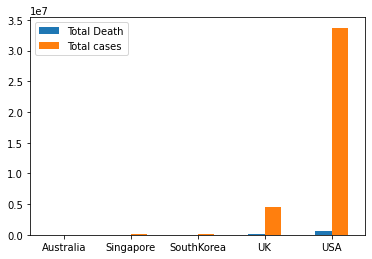

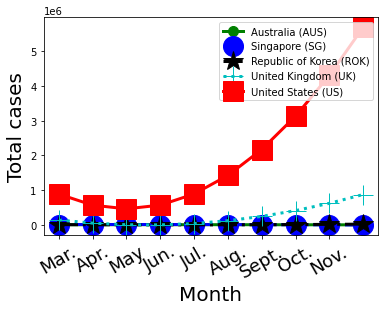

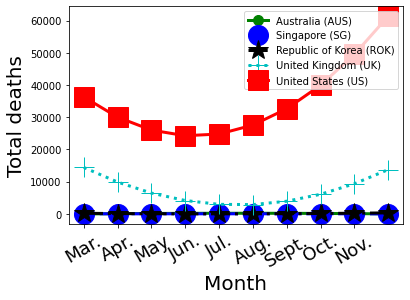

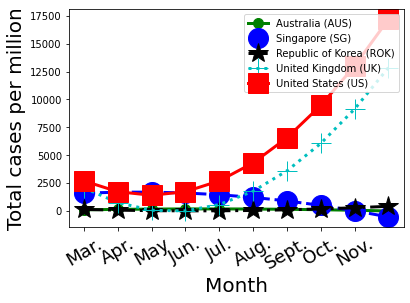

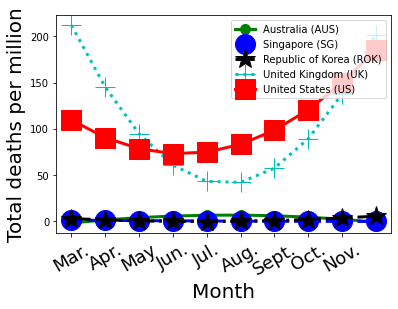

In [ ]:
COvid_data = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/Cleanned_Covid_statistics.xlsx')
COvid_data=COvid_data.drop(['location','date','population_density', 'aged_65_older', 'aged_70_older','gdp_per_capita', 'extreme_poverty'],axis=1)
COvid_Aus=COvid_data[0:11].fillna(0).diff(axis=0).iloc[1:11]
COvid_SIN =COvid_data[11:22].fillna(0).diff(axis=0).iloc[1:11]
COvid_SK =COvid_data[22:33].fillna(0).diff(axis=0).iloc[1:11]
COvid_UK =COvid_data[33:44].fillna(0).diff(axis=0).iloc[1:11]
COvid_USA =COvid_data[44:55].fillna(0).diff(axis=0).iloc[1:11]
COvid_Aus.index=range(10)
COvid_SIN.index=range(10) 
COvid_SK.index=range(10) 
COvid_UK.index=range(10) 
COvid_USA.index=range(10)


T_Death=[910,31,1903,127684,600174]
T_cases=[29978,61613,132290,4452756,33718298]
index = ['Australia','Singapore','SouthKorea','UK','USA']
df = pd.DataFrame({'Total Death':T_Death,'Total cases': T_cases}, index=index)
df.plot.bar(rot=0)
plt.show()

Data=[COvid_Aus,COvid_SIN,COvid_SK,COvid_UK,COvid_USA]
Data_name=['Australia (AUS)','Singapore (SG)','Republic of Korea (ROK)','United Kingdom (UK)','United States (US)']
#Data_name=['AUS-fake','SG-fake','ROK-fake','UK-fake','US-fake']
#Data_name=['AUS-real','SG-real','ROK-real','UK-real','US-real']

Curve=['g.-','bo--','k*-.','c+:','rs-' ]
#linestyle or ls: {'-', '--', '-.', ':', '', 
#'.'  ',' ,'o','v','^' ,'<', '>' ,'1', '2','3','4',  's', 'p','*', 'h','H','+','x','D', 'd','|'         

Column_data=['total_cases','total_deaths','total_cases_per_million','total_deaths_per_million']
Column_name=['Total cases','Total deaths','Total cases per million','Total deaths per million']

def Whatplot(Data,Column_data=Column_data[1],Fitting_Cureve_function=func_Rational,Ylabel='Total number of death'):
     Ylabel=Ylabel
     #Title='real'  
     for i in range(len(Curve)):  
          DD=Data[i][Column_data]
          Whatplot=DD
          xdata = range(Whatplot.shape[0])
          #Fitting_Cureve_function=func_Rational
          Whatplot=np.array(Whatplot)
          popt, pcov = curve_fit(Fitting_Cureve_function,xdata, Whatplot.flatten())
          plt.plot(  Fitting_Cureve_function(xdata, *popt), Curve[i],  markersize=20,linewidth=3,label=Data_name[i]) 
          #plt.plot(Whatplot, Curve[i], linewidth=2,label=Data_name[i]) 
     plt.legend(loc="upper right") 
     #plt.legend(bbox_to_anchor=(.5, 1.0, 4.35, 0.4),loc='upper center',mode = "expand", ncol = 5, prop={'size': 23})      
     #plt.title("Covid_19 related "+Title+" Tweets", fontsize=18) 
     plt.xlabel("Month", fontsize=20) 
     plt.ylabel(Ylabel, fontsize=20) 
     #plt.xticks(np.arange(9), ['March','April','May','June','July','August','September','Octobor', 'Novomber'],rotation=30)
     plt.xticks(np.arange(9), ['Mar.','Apr.','May','Jun.','Jul.','Aug.','Sept.','Oct.', 'Nov.'],rotation=30, fontsize=18)
     plt.show()
  

for i in range(len(Column_data)):
  Whatplot(Data,Column_data=Column_data[i],Fitting_Cureve_function=func_Polynomial,Ylabel=Column_name[i])

Geo Names: https://www.geonames.org/

https://www.geonames.org/countries/

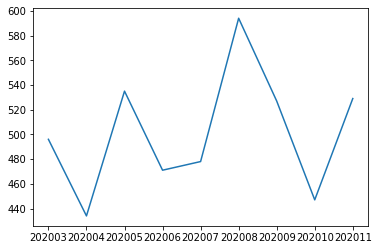

In [ ]:
################### Google Trend ################################
import time
from pytrends.request import TrendReq
pytrend = TrendReq()

geoname_list=['AU','SG','KR','GB','US-AL']
Social_dysfunction_list=['Boredom','Loneliness', 'Impairment']
Anxiety_list=['Irritability','Panic','Sleep','Stress', 'Worry']
Happiness_list=['Contentment','Sadness','Suicide','Wellbeing','Divorce']
List=[Social_dysfunction_list,Anxiety_list]



keywords=Happiness_list
timeframe1='2020-03-01 2020-11-30'
timeframe2='today 2-y'
pytrend.build_payload(kw_list=keywords,cat=0,timeframe=timeframe1,geo='US')
data = pytrend.interest_over_time()
data['time']=data.index
data['Time']=''
data.index=range(data.shape[0])
for i in range(data.shape[0]):
  Y= time.strftime('%Y%m', time.strptime(str(data['time'][i])[:7],"%Y-%m"))
  data.at[i,'Time']=Y
data=data.drop(columns=['time','isPartial'], axis=1)
data_Trend= data.groupby(['Time']).sum()
data_Trend.head(10)

#Curve=data_Trend['Boredom']+data_Trend['Loneliness']+data_Trend['Impairment']
#Curve=data_Trend['Irritability']+data_Trend['Panic']+data_Trend['Sleep']+data_Trend['Stress']+data_Trend['Worry']
Curve=data_Trend['Contentment']+data_Trend['Sadness']+data_Trend['Suicide']-data_Trend['Wellbeing']+data_Trend['Divorce']
plt.plot(Curve)

In [ ]:
USA_real_SEANCE.columns

Index(['filename', 'nwords', 'negative_adjectives_component',
       'social_order_component', 'action_component',
       'positive_adjectives_component', 'joy_component',
       'affect_friends_and_family_component', 'fear_and_digust_component',
       'politeness_component', 'polarity_nouns_component',
       'polarity_verbs_component', 'virtue_adverbs_component',
       'positive_nouns_component', 'respect_component',
       'trust_verbs_component', 'failure_component', 'well_being_component',
       'economy_component', 'certainty_component', 'positive_verbs_component',
       'objects_component'],
      dtype='object')

In [ ]:
def Goodness_fitting(y,Y_hat):  #goodness-of-fit measure   
    Residu=np.sum(abs(y-Y_hat.reshape(-1,1)))
    RSS=np.sum((y-Y_hat.reshape(-1,1))**2)          # residual sum of squares  #The sum of squares due to error (SSE) 
    TSS=np.sum((y-y.mean())**2)       # total sum of squares
    R_2=1-(RSS/TSS)                  # the coefficient of determination or R_squared
    n=y.shape[0]
    Num_var=1                  #number of independent variables
    R_2_adj=1-(  (RSS/(n-Num_var-1))     / (TSS/(n-1))  )
    return Residu, RSS,TSS, R_2, R_2_adj

In [ ]:
Data=[Australia_real,Australia_fake,Singapour_real,Singapour_fake,SouthKorea_real,SouthKorea_fake,UK_real,UK_fake,USA_real,USA_fake] 
Data_SEANCE=[Australia_real_SEANCE,Australia_fake_SEANCE,Singapour_real_SEANCE,Singapour_fake_SEANCE,SouthKorea_real_SEANCE,SouthKorea_fake_SEANCE,UK_real_SEANCE,UK_fake_SEANCE,USA_real_SEANCE,USA_fake_SEANCE] 
Data=Delete_last_row(Data)
Data_SEANCE=Delete_last_row(Data_SEANCE)
Data_name=['Australia_real','Australia_fake','Singapore_real','Singapore_fake','SouthKorea_real','SouthKorea_fake','UK_real','UK_fake','USA_real','USA_fake']
Curve=['g.-','bo--','k*-.','c+:','rs-' ]



def Whatplot(functions,target,Fitting_Cureve_function=func_Rational):
     for i in range(len(Curve)): 
          if target=='real':
             j=2*i  
             Title='real'  
          elif target=='fake':
             j=2*i+1
             Title='fake'          
          
          if functions==frequency:  Ylabel='Frequency of '+Title+' tweet'  
          elif functions==wellbeing :  Ylabel='Mental wellbeing '  
          elif functions==Cooperation_f:  Ylabel='Community capital'  
          #elif functions==CR_f:  Ylabel='Community resilience'   
          elif functions==Physical_health_f:  Ylabel='Physical wellbeing'  
          elif functions==Social_well_being_f:  Ylabel='Social wellbeing'  
          elif functions==Social_well_being_social_netwrok_f:  Ylabel='Ratio of social \n'+ 'related languages'  
          elif functions==Social_well_being_family_netwrok_f:  Ylabel='Ratio of family \n' +'related languages'  
          elif functions==Social_well_being_work_netwrok_f:  Ylabel='Ratio of work \n' +'related languages' 
          elif functions==CR_well:  Ylabel='Community wellbeing' 
          elif functions==CR_wellbeing :  Ylabel='Community resilience '  

 
          DD=Data[j]
          DData_SEANCE=Data_SEANCE[j]    
          Whatplot=functions(DD,DData_SEANCE)
          
          xdata = range(Whatplot.shape[0])
          #Fitting_Cureve_function=func_Rational
          Whatplot=np.array(Whatplot)
          popt, pcov = curve_fit(Fitting_Cureve_function,xdata, Whatplot.flatten())
          plt.plot(  Fitting_Cureve_function(xdata, *popt), Curve[i], markersize=13,linewidth=3,label=Data_name[j]) 
          #plt.plot(Whatplot, Curve[i], linewidth=2,label=Data_name[j]) 

     #plt.legend(loc="upper right") 
     #plt.legend(loc='best')       
     #plt.title("Covid_19 related "+Title+" Tweets", fontsize=18) 
     plt.xlabel("Month", ) 
     plt.ylabel(Ylabel, fontsize=20) 
     #plt.xticks(np.arange(9), ['March','April','May','June','July','August','September','Octobor', 'Novomber'],rotation=30)
     plt.xticks(np.arange(9), ['Mar.','Apr.','May','Jun.','Jul.','Aug.','Sept.','Oct.', 'Nov.'],rotation=30, fontsize=18)
     plt.show()
     return Goodness_fitting(Whatplot,Fitting_Cureve_function(xdata, *popt))

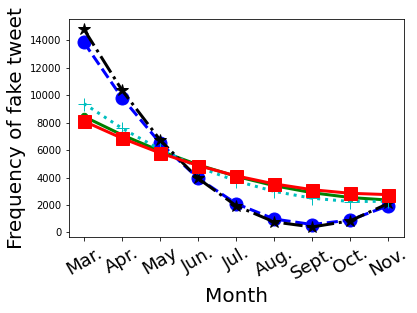

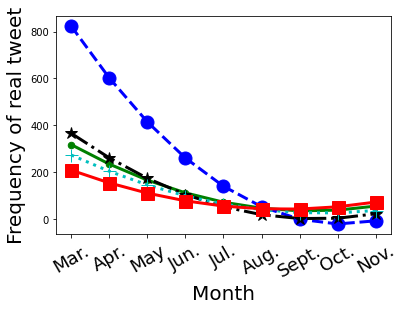

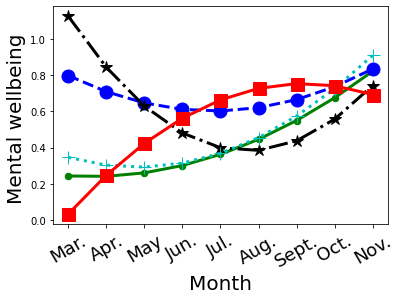

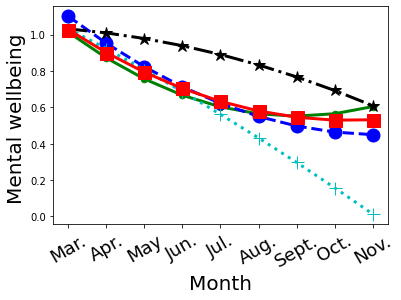

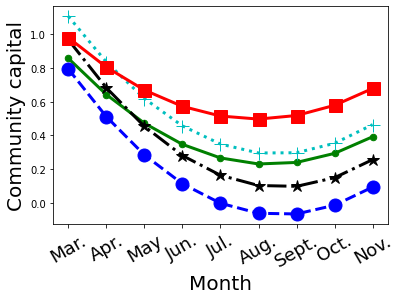

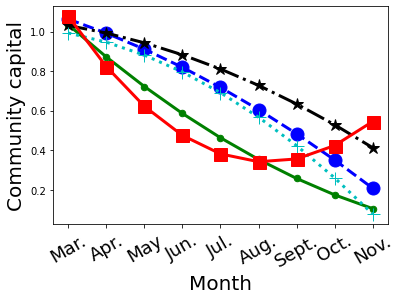

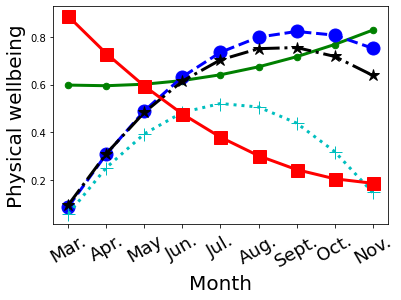

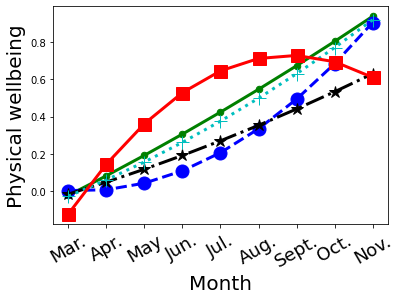

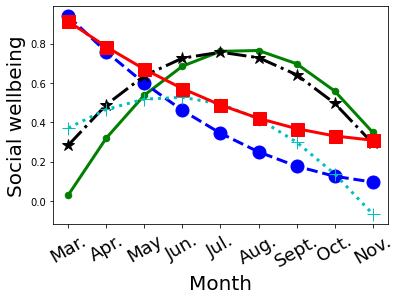

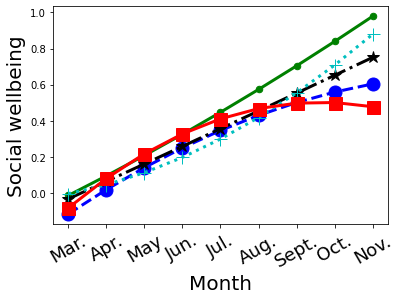

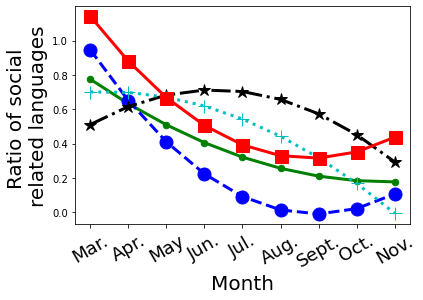

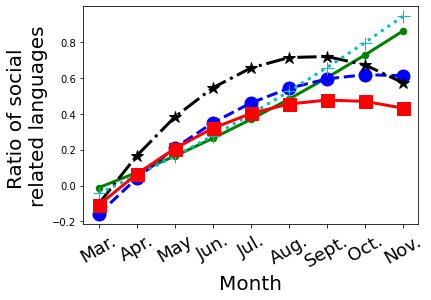

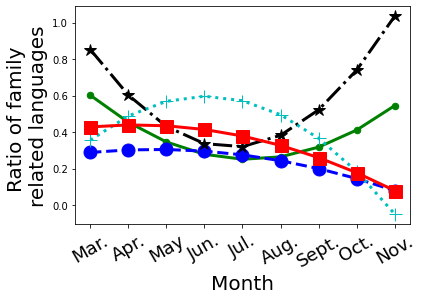

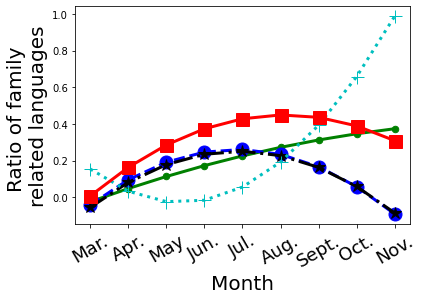

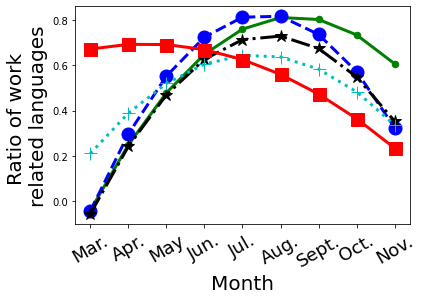

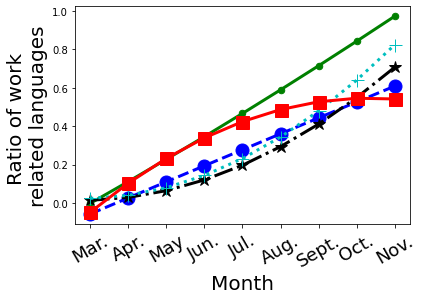

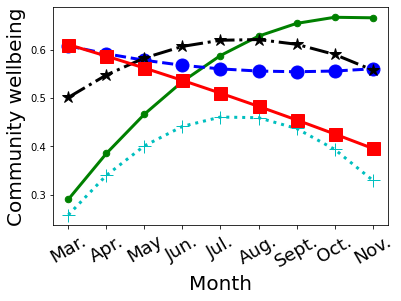

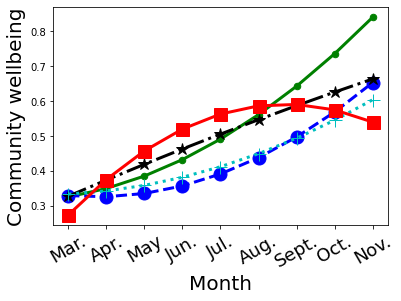

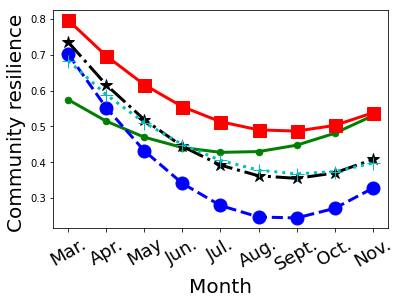

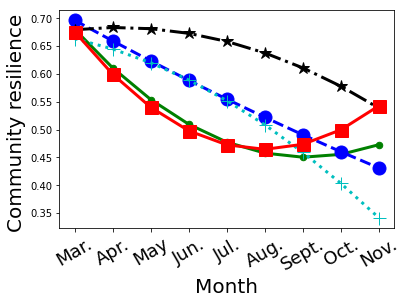

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))


def frequency(DD,Data_SEANCE):
    return DD['frequency']

def wellbeing(Data,Data_SEANCE): 
   scaler = MinMaxScaler(feature_range=(0, 1))  
   Mental_health=(Data['anx']+Data['sad']+Data['anger'])/(Data['WC'] )
   Mental_health=np.array(Mental_health)
   scaler.fit(Mental_health.reshape(-1, 1))
   Mental_health = scaler.transform(Mental_health.reshape(-1, 1))
   Mental_health=1-Mental_health
   #Mental_health2=(Data_SEANCE['well_being_component'])/(Data_SEANCE['nwords'] )
   #Mental_health2=(Data_SEANCE['joy_component']+Data_SEANCE['well_being_component'])/(Data_SEANCE['nwords'] )
   #Mental_health2=np.array(Mental_health2)
   #scaler.fit(Mental_health2.reshape(-1, 1))
   #Mental_health2 = scaler.transform(Mental_health2.reshape(-1, 1))
   #Mental_health1= (Mental_health+Mental_health2)/2
   return Mental_health

def Cooperation_f(Data,Data_SEANCE):
     #Cooperation=(Data['WC']-Data['Sixltr']+Data['we']+Data['social']+Data['family']+Data['friend']+Data['assent'])/(Data['WC'])
     Cooperation=(-Data['Sixltr']+Data['we']+Data['social']+Data['family']+Data['friend']+Data['assent'])/(Data['WC'])
     Cooperation=Cooperation
     Cooperation=np.array(Cooperation)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Cooperation.reshape(-1, 1))
     Cooperation = scaler.transform(Cooperation.reshape(-1, 1))
     return Cooperation

def Physical_health_f(Data,Data_SEANCE):
     Physical_health=(-Data['i']+Data['health']+Data['leisure']+Data['work']+Data['body']+Data['motion'])/(Data['WC'])
     Physical_health=np.array(Physical_health)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Physical_health.reshape(-1, 1))
     Physical_health = scaler.transform(Physical_health.reshape(-1, 1))
     return Physical_health


def Social_well_being_f(Data,Data_SEANCE):
     Social_well_bein=(+Data['social']+Data['friend']+Data['relig']+Data['family']+Data['money']+Data['achieve']+Data['reward'])/(Data['WC'])
     Social_well_bein=np.array(Social_well_bein)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_bein.reshape(-1, 1))
     Social_well_bein = scaler.transform(Social_well_bein.reshape(-1, 1))
     return Social_well_bein


def Social_well_being_social_netwrok_f(Data,Data_SEANCE):
     Social_well_being_social_netwrok=(+Data['social']+Data['friend']+Data['relig'])/(Data['WC'])
     Social_well_being_social_netwrok=np.array(Social_well_being_social_netwrok)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_being_social_netwrok.reshape(-1, 1))
     Social_well_being_social_netwrok = scaler.transform(Social_well_being_social_netwrok.reshape(-1, 1))
     return Social_well_being_social_netwrok

def Social_well_being_family_netwrok_f(Data,Data_SEANCE):
     Social_well_being_family_netwrok=(Data['family'])/(Data['WC'])
     Social_well_being_family_netwrok=np.array(Social_well_being_family_netwrok)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_being_family_netwrok.reshape(-1, 1))
     Social_well_being_family_netwrok = scaler.transform(Social_well_being_family_netwrok.reshape(-1, 1))
     return Social_well_being_family_netwrok

def Social_well_being_work_netwrok_f(Data,Data_SEANCE):
     Social_well_being_work=(Data['money']+Data['achieve']+Data['reward'])/(Data['WC'])
     Social_well_being_work=np.array(Social_well_being_work)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_being_work.reshape(-1, 1))
     Social_well_being_work = scaler.transform(Social_well_being_work.reshape(-1, 1))
     return Social_well_being_work



def CR_well(Data,Data_SEANCE):
   CR2=(Social_well_being_f(Data,Data_SEANCE)+Physical_health_f(Data,Data_SEANCE)+wellbeing(Data,Data_SEANCE) )/3
   return CR2

def CR_wellbeing(Data,Data_SEANCE):
   CR2=(((Social_well_being_f(Data,Data_SEANCE)+Physical_health_f(Data,Data_SEANCE)+wellbeing(Data,Data_SEANCE) )/3)+Cooperation_f(Data,Data_SEANCE))/2
   return CR2

functions=[frequency,wellbeing,Cooperation_f,Physical_health_f,Social_well_being_f,Social_well_being_social_netwrok_f,Social_well_being_family_netwrok_f,Social_well_being_work_netwrok_f,CR_well,CR_wellbeing]
Target=['fake','real'] 
Fitting_Cureve_function=[func_exp,func_Gaussian,func_Polynomial,func_Power,func_Rational,func_sine,func_Weibull]
for i in range(len(functions)):
   for j in range(len(Target)):
        Whatplot(functions[i],target=Target[j],Fitting_Cureve_function=Fitting_Cureve_function[2])

In [ ]:
# Goodness for only one curve  


def Whatplot(functions,target,Fitting_Cureve_function=func_Rational):
     for i in range(len(Curve)): 
          if functions==frequency:  Ylabel='tweets frequency'  
          elif functions==wellbeing :  Ylabel='Community Wellbeing '  
          elif functions==Cooperation_f:  Ylabel='Community Capital'  
          elif functions==CR_f:  Ylabel='Community Resilience'    
          
          wellbeing  
          if target=='real':
             j=2*i  
             Title='real'  
          elif target=='fake':
             j=2*i+1
             Title='fake' 
          DD=Data[j]
          DData_SEANCE=Data_SEANCE[j]    
          Whatplot=functions(DD,DData_SEANCE)
          
          xdata = range(Whatplot.shape[0])
          #Fitting_Cureve_function=func_Rational
          Whatplot=np.array(Whatplot)
          popt, pcov = curve_fit(Fitting_Cureve_function,xdata, Whatplot.flatten())
     return Goodness_fitting(Whatplot,Fitting_Cureve_function(xdata, *popt))


functions=[frequency,wellbeing,Cooperation_f,CR_f]
Target=['fake','real'] 
#Fitting_Cureve_function=[func_exp,func_Gaussian,func_Polynomial,func_Power,func_Rational,func_sine,func_Weibull]
Fitting_Cureve_function_name=['func_exp','func_Gaussian','func_Polynomial','func_Power','func_Rational','func_sine','func_Weibull']


Results_goodness=pd.DataFrame(range(len(Fitting_Cureve_function_name)))
Results_goodness.index=Fitting_Cureve_function_name
Results_goodness['Residu']=''
Results_goodness['RSS']=''
Results_goodness['TSS']=''
Results_goodness['R2']=''
Results_goodness['R2_adj']=''

Fitting_Cureve_function=[func_Polynomial,func_Power,func_sine,func_Weibull]
Fitting_Cureve_function_name=['func_Polynomial','func_Power','func_sine','func_Weibull']

#Fitting_Cureve_function=[func_Polynomial,func_Power,func_Weibull]
#Fitting_Cureve_function_name=['func_Polynomial','func_Power','func_Weibull']


#0,0:  3 cases: [func_Polynomial,func_Power,func_Weibull]
#0,1:  3 cases: [func_Polynomial,func_Power,func_Weibull]
#1,0:  3 cases: [func_Polynomial,func_Power,func_Weibull]
#1,1:  4 case:   ['func_Polynomial','func_Power','func_sine','func_Weibull']
#2,0:  all caees
#2,1:  4 case:   ['func_Polynomial','func_Power','func_sine','func_Weibull']
#3,0:  4 case:   ['func_Polynomial','func_Power','func_sine','func_Weibull']
#3,1:  3 cases: [func_Polynomial,func_Power,func_Weibull]

for i in range(len(Fitting_Cureve_function)):
        Residu, RSS,TSS, R_2, R_2_adj=Whatplot(functions[2],target=Target[1],Fitting_Cureve_function=Fitting_Cureve_function[i])
        Results_goodness.at[Fitting_Cureve_function_name[i],'Residu']=Residu
        Results_goodness.at[Fitting_Cureve_function_name[i],'RSS']=RSS
        Results_goodness.at[Fitting_Cureve_function_name[i],'TSS']=TSS
        Results_goodness.at[Fitting_Cureve_function_name[i],'R2']=R_2
        Results_goodness.at[Fitting_Cureve_function_name[i],'R2_adj']=R_2_adj
Results_goodness.head(7)


NameError: ignored

# Each country seperate

In [ ]:
def Whatplot(functions):
    f = plt.figure(figsize=(15,14))
    number_countries=5
    Data=[Australia_real,Australia_fake,Singapour_real,Singapour_fake,SouthKorea_real,SouthKorea_fake,UK_real,UK_fake,USA_real,USA_fake] 
    Data_name=['Australia_real','Australia_fake','Singapour_real','Singapour_fake','SouthKorea_real','SouthKorea_fake','UK_real','UK_fake','USA_real','USA_fake']
    for i in range(number_countries*2):
        ax = f.add_subplot(number_countries,2,i+1)
        DD=Data[i]
        Whatplot=functions(DD)
        x = np.arange(1,Australia_fake['frequency'].shape[0]) 
        ax.plot(Whatplot, 'go-', linewidth=2)  
        plt.title(Data_name[i]+"Covid_19-related  news", fontsize=18) 
        #plt.xlabel("Month", fontsize=15) 
        plt.ylabel("tweets frequency", fontsize=15) 
        plt.xticks(np.arange(10), ['March','April','May','June','July','August','September','Octobor', 'Novomber','December'],rotation=30)
    
    plt.subplots_adjust(#left=0.1,
                    #bottom=0.1, 
                    #right=0.9, 
                    #top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
    plt.show()
#Whatplot(frequency)

**Well being**

The mental illness includes mood disorders (such as depression or bipolar disorder), anxiety disorders, personality disorders, psychotic disorders (such as schizophrenia), eating disorders, SAD, trauma-related disorders (such as post-traumatic stress disorder), substance abuse disorders, panic disorder, and obsessive-compulsive disorder. They result from negative emotional traits, i.e., anxiety, sadness, and angriness. By measuring these features, we can evaluate spatial-temporal mental health using the Tweeter dataset. In addition, we leverage the pattern of life as a supplementary dataset to analyze mental health. One example of the pattern of life is related to Insomnia and sleep disturbance of the people in the community. That is measured by the number of people tweeting between midnight and 4 a.m. according to their local time zone during each disaster. Mental health is obtained by averaging the normalized value of anxiety, sadness, angriness, and pattern of life.

In [ ]:

##############################################  Normalization ############################################ 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))


def wellbeing(Data): 
################## Approach 1 ################################
   scaler = MinMaxScaler(feature_range=(0, 1))
   Mental_health=(Data['anx']+Data['sad']+Data['anger'])/(Data['WC'] )
   Mental_health=np.array(Mental_health)
   scaler.fit(Mental_health.reshape(-1, 1))
   Mental_health = scaler.transform(Mental_health.reshape(-1, 1))
   Mental_health=1-Mental_health
   return Mental_health

#Whatplot(wellbeing)

**Cooperation**

1- Based on language’s psychological study,the  more  used  words  in  the  communication,  the  higher  levelof agreement and cooperation.

2- The increased use of complexwords  and  words  with  more  than  six  letters  implies  lessefficient  communication,  cooperation,  and  social  interaction.

3- In  addition,  the  first  person  plural  signals  group  interactionand  cohesion. 

4-  Using  more  social  process  languages  such  asfamily and friends-related words implies more social interac-tion, engagement, and cooperation. 

5-Finally, the assent-relatedlanguage  causes  increased  group  consensus,  interaction,  andcooperation

In [ ]:
########################################### Cooperation by LIWC ########################################


##############################################  Normalization ############################################ 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


################################### Approach 1 #####################################
def Cooperation_f(Data):
     Cooperation=(Data['WC']-Data['Sixltr']+Data['we']+Data['social']+Data['family']+Data['friend']+Data['assent'])/(Data['WC'])
     Cooperation=Cooperation
     Cooperation=np.array(Cooperation)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Cooperation.reshape(-1, 1))
     Cooperation = scaler.transform(Cooperation.reshape(-1, 1))
     return Cooperation


#Whatplot(Cooperation_f)

Commmunity resilince

In [ ]:
def CR_f(Data):
   CR=(Cooperation_f(Data)+wellbeing((Data)))/2
   return CR
#Whatplot(CR_f)

#Summery of Results

In [ ]:
def Ave_f(DD):
    DD=DD[~np.isnan(DD).any(axis=1), :]
    return np.average(DD)

def Whatinfo(Ave_f):
  Result=pd.DataFrame()
  Result['Mental health']=''
  #Result['Community Resilience']=''
  Result['Physical health']=''
  Result['Social network wellbeing']=''
  Result['Family netwrok wellbeing']=''
  Result['Work netwrok wellbeing']=''
  Result['Social wellbeing']=''
  Result['Community wellbeing' ]=''
  Result['Community Capital']=''
  Result['Community Resilience']=''



  number_countries=5
  Data=[Australia_real,Australia_fake,Singapour_real,Singapour_fake,SouthKorea_real,SouthKorea_fake,UK_real,UK_fake,USA_real,USA_fake] 
  Data_SEANCE=[Australia_real_SEANCE,Australia_fake_SEANCE,Singapour_real_SEANCE,Singapour_fake_SEANCE,SouthKorea_real_SEANCE,SouthKorea_fake_SEANCE,UK_real_SEANCE,UK_fake_SEANCE,USA_real_SEANCE,USA_fake_SEANCE] 
  Data=Delete_last_row(Data)
  Data_SEANCE=Delete_last_row(Data_SEANCE)
  Data_name=['Australia_real','Australia_fake','Singapore_real','Singapore_fake','SouthKorea_real','SouthKorea_fake','UK_real','UK_fake','USA_real','USA_fake']
  for i in range(number_countries*2):
        DD=Data[i]
        DData_SEANCE=Data_SEANCE[i]
        Result.at[Data_name[i],'Mental health']=Ave_f(wellbeing(DD,DData_SEANCE))
        Result.at[Data_name[i],'Community Capital']=Ave_f(Cooperation_f(DD,DData_SEANCE))
        #Result.at[Data_name[i],'Community Resilience']=Ave_f(CR_f(DD,DData_SEANCE))
        Result.at[Data_name[i],'Physical health']=Ave_f(Physical_health_f(DD,DData_SEANCE))
        Result.at[Data_name[i],'Social wellbeing']=Ave_f(Social_well_being_f(DD,DData_SEANCE))
        Result.at[Data_name[i],'Social network wellbeing']=Ave_f(Social_well_being_social_netwrok_f(DD,DData_SEANCE))
        Result.at[Data_name[i],'Family netwrok wellbeing']=Ave_f(Social_well_being_family_netwrok_f(DD,DData_SEANCE))
        Result.at[Data_name[i],'Work netwrok wellbeing']=Ave_f(Social_well_being_work_netwrok_f(DD,DData_SEANCE))
        Result.at[Data_name[i],'Community wellbeing']=Ave_f(CR_well(DD,DData_SEANCE))
        Result.at[Data_name[i],'Community Resilience']=Ave_f(CR_wellbeing(DD,DData_SEANCE))




  return Result.head(number_countries*2)


Whatinfo(Ave_f)


,Mental health,Physical health,Social network wellbeing,Family netwrok wellbeing,Work netwrok wellbeing,Social wellbeing,Community wellbeing,Community Capital,Community Resilience
Australia_real,0.688428,0.43859,0.392289,0.204834,0.474388,0.462138,0.529719,0.50749,0.518604
Australia_fake,0.433319,0.670769,0.386223,0.385184,0.56042,0.522892,0.542327,0.416108,0.479217
Singapore_real,0.685827,0.309893,0.363245,0.125056,0.276945,0.304281,0.433333,0.683229,0.558281
Singapore_fake,0.691329,0.603633,0.273379,0.236962,0.532018,0.41626,0.570407,0.183696,0.377052
SouthKorea_real,0.861408,0.285885,0.480619,0.117594,0.265161,0.357873,0.501722,0.773531,0.637626
SouthKorea_fake,0.622041,0.563171,0.578242,0.579874,0.477473,0.561397,0.582203,0.350809,0.466506
UK_real,0.545775,0.405465,0.419491,0.270616,0.311826,0.35708,0.436106,0.626153,0.53113
UK_fake,0.476304,0.346344,0.462275,0.397564,0.489464,0.351327,0.391325,0.531264,0.461295
USA_real,0.693946,0.478711,0.301635,0.316113,0.350512,0.32242,0.498359,0.560576,0.529468
USA_fake,0.53838,0.44454,0.558224,0.326446,0.553072,0.539174,0.507364,0.646672,0.577018


Plt colors:

https://matplotlib.org/stable/gallery/color/named_colors.html

Markers:

https://matplotlib.org/stable/api/markers_api.html

([<matplotlib.axis.XTick at 0x7f5786c328d0>,
 [Text(0, 0, '             Community\n            wellbeing'),
  Text(0, 0, '             Community\n            capital'),
  Text(0, 0, '             Community\n            resilience')])

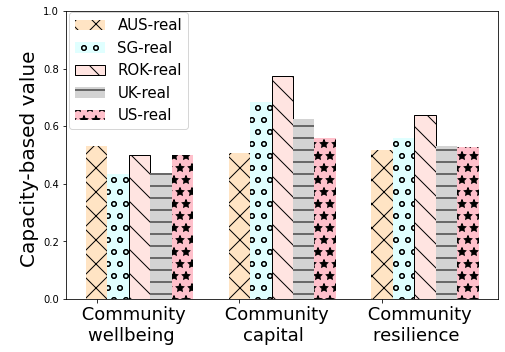

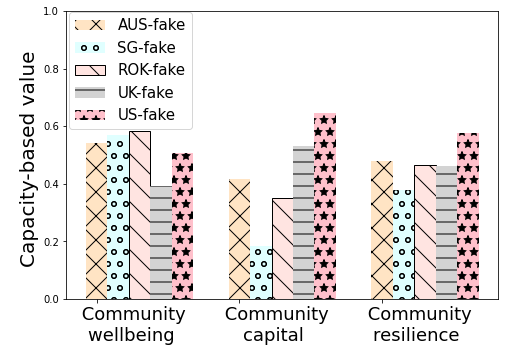

In [ ]:
summary=Whatinfo(Ave_f).drop(['Mental health','Physical health','Social network wellbeing','Family netwrok wellbeing','Work netwrok wellbeing','Social wellbeing'],axis=1)
Real_summary=summary.drop(['Australia_fake','Singapore_fake','SouthKorea_fake','UK_fake','USA_fake'],axis=0).T
fake_summary=summary.drop(['Australia_real','Singapore_real','SouthKorea_real','UK_real','USA_real'],axis=0).T

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Real_summary['Australia_real'], color = 'bisque', hatch = 'x',width = 0.15)
ax.bar(X + 0.15, Real_summary['Singapore_real'], color = 'lightcyan',hatch = 'o', width = 0.15)
ax.bar(X + 0.3, Real_summary['SouthKorea_real'], color = 'mistyrose', edgecolor='k',hatch = '\\', width = 0.15)
ax.bar(X + 0.45, Real_summary['UK_real'], color = 'lightgray',hatch = '-', width = 0.15)
ax.bar(X + 0.6,    Real_summary['USA_real'],   color = 'pink',hatch = '*', width = 0.15)
#ax.legend(labels=['AUS-real','SG-real','ROK-real','UK-real','US-real'],loc="best", fontsize=18)
ax.legend(bbox_to_anchor=(-.01, .922, 4., 0.1),loc='upper left', prop={'size': 15},labels=['AUS-real','SG-real','ROK-real','UK-real','US-real'])   
ax.set_ylim(0,1)
plt.ylabel('Capacity-based value ', fontsize=20) 
plt.xticks(np.arange(3), ['             Community\n            wellbeing','             Community\n            capital','             Community\n            resilience'],rotation=0, fontsize=18)
#plt.yticks(fontsize=18)


X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, fake_summary['Australia_fake'], color = 'bisque',hatch = 'x', width = 0.15)
ax.bar(X + 0.15, fake_summary['Singapore_fake'], color = 'lightcyan',hatch = 'o', width = 0.15)
ax.bar(X + 0.30, fake_summary['SouthKorea_fake'], color = 'mistyrose', edgecolor='k',hatch = '\\', width = 0.15)
ax.bar(X + 0.45, fake_summary['UK_fake'], color = 'lightgray', hatch = '-',width = 0.15)
ax.bar(X + 0.60,    fake_summary['USA_fake'],   color = 'pink',hatch = '*', width = 0.15)
#ax.legend(labels=['AUS-fake','SG-fake','ROK-fake','UK-fake','US-fake'],loc="best", fontsize=18)
ax.legend(bbox_to_anchor=(-.01, .922, 4., 0.1),loc='upper left', prop={'size': 15},labels=['AUS-fake','SG-fake','ROK-fake','UK-fake','US-fake'])   
ax.set_ylim(0,1)
plt.ylabel('Capacity-based value ', fontsize=20) 
plt.xticks(np.arange(3), ['             Community\n            wellbeing','             Community\n            capital','             Community\n            resilience'],rotation=0, fontsize=18)
#plt.yticks(fontsize=18)



([<matplotlib.axis.XTick at 0x7f62747b1cd0>,
 [Text(0, 0, 'Community\n wellbeing'),
  Text(0, 0, 'Community\n capital'),
  Text(0, 0, 'Community\n resilience')])

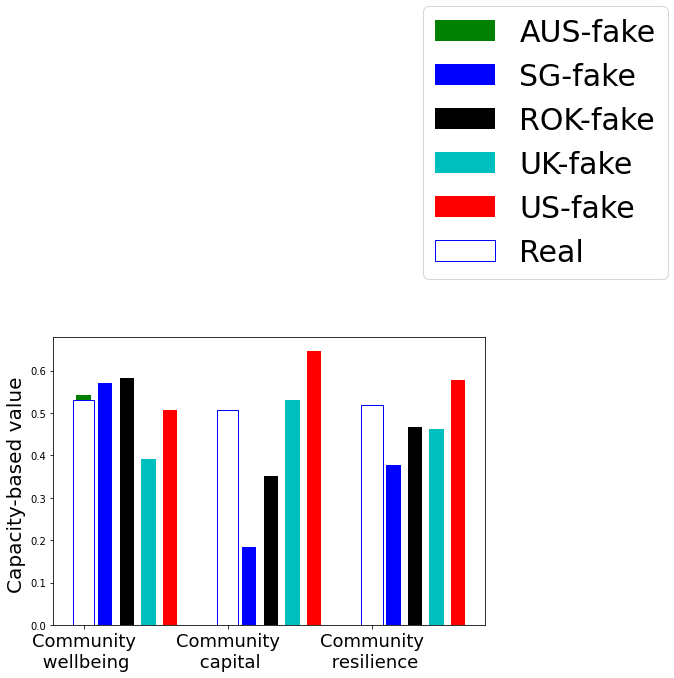

In [ ]:
summary=Whatinfo(Ave_f).drop(['Mental health','Physical health','Social network wellbeing','Family netwrok wellbeing','Work netwrok wellbeing','Social wellbeing'],axis=1)
Real_summary=summary.drop(['Australia_fake','Singapore_fake','SouthKorea_fake','UK_fake','USA_fake'],axis=0).T
fake_summary=summary.drop(['Australia_real','Singapore_real','SouthKorea_real','UK_real','USA_real'],axis=0).T


X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, fake_summary['Australia_fake'], color = 'g', width = 0.1)
ax.bar(X + 0.15, fake_summary['Singapore_fake'], color = 'b', width = 0.1)
ax.bar(X + 0.30, fake_summary['SouthKorea_fake'], color = 'k', width = 0.1)
ax.bar(X + 0.45, fake_summary['UK_fake'], color = 'c', width = 0.1)
ax.bar(X + 0.6,    fake_summary['USA_fake'],   color = 'r', width = 0.1)
ax.bar(X + 0.00, Real_summary['Australia_real'], color = 'w', width = 0.15,  edgecolor='blue')
#ax.legend(labels=['AUS-fake','SG-fake','ROK-fake','UK-fake','US-fake'],loc="best", fontsize=18)
ax.legend(bbox_to_anchor=(-.06, 2, 2.4, 0.2),loc='upper center', prop={'size': 30},labels=['AUS-fake','SG-fake','ROK-fake','UK-fake','US-fake','Real'])   
plt.ylabel('Capacity-based value ', fontsize=20) 
plt.xticks(np.arange(3), ['Community\n wellbeing','Community\n capital','Community\n resilience'],rotation=0, fontsize=18)
#plt.yticks(fontsize=18)



([<matplotlib.axis.XTick at 0x7f6272520310>,
 [Text(0, 0, 'Community\n wellbeing'),
  Text(0, 0, 'Community\n capital'),
  Text(0, 0, 'Community\n resilience')])

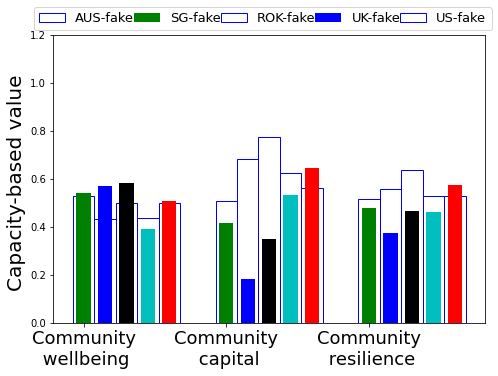

In [ ]:
summary=Whatinfo(Ave_f).drop(['Mental health','Physical health','Social network wellbeing','Family netwrok wellbeing','Work netwrok wellbeing','Social wellbeing'],axis=1)
Real_summary=summary.drop(['Australia_fake','Singapore_fake','SouthKorea_fake','UK_fake','USA_fake'],axis=0).T
fake_summary=summary.drop(['Australia_real','Singapore_real','SouthKorea_real','UK_real','USA_real'],axis=0).T


X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Real_summary['Australia_real'], color = 'w', width = 0.15,  edgecolor='blue')
ax.bar(X + 0.00, fake_summary['Australia_fake'], color = 'g', width = 0.1)

ax.bar(X + 0.15, Real_summary['Singapore_real'], color = 'w', width = 0.15,  edgecolor='blue')
ax.bar(X + 0.15, fake_summary['Singapore_fake'], color = 'b', width = 0.1)


ax.bar(X + 0.30, Real_summary['SouthKorea_real'], color = 'w', width = 0.15,  edgecolor='blue')
ax.bar(X + 0.30, fake_summary['SouthKorea_fake'], color = 'k', width = 0.1)

ax.bar(X + 0.45, Real_summary['UK_real'], color = 'w', width = 0.15,  edgecolor='blue')
ax.bar(X + 0.45, fake_summary['UK_fake'], color = 'c', width = 0.1)

ax.bar(X + 0.6,    Real_summary['USA_real'],   color = 'w', width = 0.15,  edgecolor='blue')
ax.bar(X + 0.6,    fake_summary['USA_fake'],   color = 'r', width = 0.1)
#ax.legend(labels=['AUS-fake','SG-fake','ROK-fake','UK-fake','US-fake'],loc="best", fontsize=18)
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor=(-.06, 1.02, 1.09, 0.1),loc='upper center',mode = "expand", ncol = 5, prop={'size': 13},labels=['AUS-fake','SG-fake','ROK-fake','UK-fake','US-fake'])   
plt.ylabel('Capacity-based value ', fontsize=20) 
plt.xticks(np.arange(3), ['Community\n wellbeing','Community\n capital','Community\n resilience'],rotation=0, fontsize=18)
#plt.yticks(fontsize=18)



In [ ]:
Result=Whatinfo(Ave_f)
Result.to_excel("output.xlsx",sheet_name='Sheet_name_1')  

In [ ]:
Result=Whatinfo(Ave_f)
Result.T

,Australia_real,Australia_fake,Singapore_real,Singapore_fake,SouthKorea_real,SouthKorea_fake,UK_real,UK_fake,USA_real,USA_fake
Mental health,0.688428,0.433319,0.685827,0.691329,0.861408,0.622041,0.545775,0.476304,0.693946,0.53838
Physical health,0.43859,0.670769,0.309893,0.603633,0.285885,0.563171,0.405465,0.346344,0.478711,0.44454
Social network wellbeing,0.392289,0.386223,0.363245,0.273379,0.480619,0.578242,0.419491,0.462275,0.301635,0.558224
Family netwrok wellbeing,0.204834,0.385184,0.125056,0.236962,0.117594,0.579874,0.270616,0.397564,0.316113,0.326446
Work netwrok wellbeing,0.474388,0.56042,0.276945,0.532018,0.265161,0.477473,0.311826,0.489464,0.350512,0.553072
Social wellbeing,0.462138,0.522892,0.304281,0.41626,0.357873,0.561397,0.35708,0.351327,0.32242,0.539174
Community wellbeing,0.529719,0.542327,0.433333,0.570407,0.501722,0.582203,0.436106,0.391325,0.498359,0.507364
Community Capital,0.50749,0.416108,0.683229,0.183696,0.773531,0.350809,0.626153,0.531264,0.560576,0.646672
Community Resilience,0.518604,0.479217,0.558281,0.377052,0.637626,0.466506,0.53113,0.461295,0.529468,0.577018


correlation:

https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html
Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement. This is the tau-b version of Kendall’s tau which accounts for ties.


In the majority of analyses, an alpha of 0.05 is used as the cutoff for significance. If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist.


https://gmarti.gitlab.io/qfin/2020/06/25/copula-optimal-transport-dependence.html

In [ ]:
#!pip install POT
#import ot
#Ref copula

def Emprical(x,y):
    Xunif = rankdata(x) / len(x)
    Yunif = rankdata(y) / len(y) 
    empirical = np.array(
        [[x, y] for x, y in zip(Xunif, Yunif)])
    return empirical

def compute_copula_ot_dependence(empirical, target, forget):
    # uniform distribution on samples
    t_measure, f_measure, e_measure = (
        np.ones((nb_obs,)) / nb_obs,
        np.ones((nb_obs,)) / nb_obs,
        np.ones((nb_obs,)) / nb_obs)
    # compute the ground distance matrix between locations
    gdist_e2t = ot.dist(empirical, target)
    gdist_e2f = ot.dist(empirical, forget)
    # compute the optimal transport matrix
    e2t_ot = ot.emd(t_measure, e_measure, gdist_e2t)
    e2f_ot = ot.emd(f_measure, e_measure, gdist_e2f)
    # compute the optimal transport distance:
    # <optimal transport matrix, ground distance matrix>_F
    e2t_dist = np.trace(np.dot(np.transpose(e2t_ot), gdist_e2t))
    e2f_dist = np.trace(np.dot(np.transpose(e2f_ot), gdist_e2f))
    # compute the copula ot dependence measure
    return 1 - e2t_dist / (e2f_dist + e2t_dist)

def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import (kendalltau,rankdata)

#tau, p_value =kendalltau(x1, x2)


def Corr_summ(name='Mental health'):
  A=np.zeros([5])
  B=np.zeros([5])
  for i in range(5): 
      A[i]=Result[name][2*i]
      B[i]=Result[name][2*i+1]
  corr1,_ = pearsonr(A,B)
  corr2,_ = spearmanr(A,B)
  corr3=np.dot (A, B)/(np.linalg.norm (A) * np.linalg.norm (B))
  corr4, p_value=kendalltau(A,B)
  nb_obs = len(A)
  target = np.array([[i / nb_obs, i / nb_obs]
                   for i in range(nb_obs)])
  forget = np.array([[u, v]
                   for u, v in zip(np.random.uniform(size=nb_obs),
                                   np.random.uniform(size=nb_obs))])
  #corr5=compute_copula_ot_dependence(Emprical(A,B), target, forget)
  corr5=cramers_v(A,B)
  return corr1,corr2,corr3,corr4,corr5

Columns=['Mental health', 'Physical health', 'Social network wellbeing','Family netwrok wellbeing', 'Work netwrok wellbeing','Social wellbeing', 'Community wellbeing', 'Community Capital','Community Resilience']
Coreelation=pd.DataFrame()
Coreelation['Pearson correlation coefficient']=''
Coreelation['Spearman correlation coefficient']=''
Coreelation['Cosine similarity']=''
Coreelation['kendalltau']=''
#Coreelation['copula optimal transport dependence']=''

for i in range(len(Columns)):    
  corr1,corr2,corr3,corr4,corr5=Corr_summ(Columns[i])
  Coreelation.at[Columns[i],'Pearson correlation coefficient']=corr1
  Coreelation.at[Columns[i],'Spearman correlation coefficient']=corr2
  Coreelation.at[Columns[i],'Cosine similarity']=corr3
  Coreelation.at[Columns[i],'kendalltau']=corr4
  #Coreelation.at[Columns[i],'copula optimal transport dependence']=corr5
Coreelation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_

,Pearson correlation coefficient,Spearman correlation coefficient,Cosine similarity,kendalltau
Mental health,0.476857,0.2,0.987136,0.2
Physical health,-0.303678,-0.1,0.946324,0
Social network wellbeing,0.208911,0.4,0.966856,0.4
Family netwrok wellbeing,-0.246647,-0.3,0.873083,-0.2
Work netwrok wellbeing,0.723481,0.9,0.983812,0.8
Social wellbeing,0.268113,0.3,0.981601,0.2
Community wellbeing,0.418267,0.2,0.992558,0.2
Community Capital,-0.520993,-0.6,0.9013,-0.4
Community Resilience,-0.250621,-0.6,0.985435,-0.4


In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr


def output_outlier_free(Whatplot):
    X=func_Polynomial(range(Whatplot.shape[0]), *curve_fit(func_Polynomial,range(Whatplot.shape[0]), np.array(Whatplot).flatten())[0])
    return X

Columns=['Mental health', 'Physical health', 'Social network wellbeing','Family netwrok wellbeing', 'Work netwrok wellbeing','Social wellbeing', 'Community wellbeing', 'Community Capital','Community Resilience']
Coreelation=pd.DataFrame()
Coreelation['Pearson_AUS']=''
Coreelation['Spearman_AUS']=''
Coreelation['Pearson_SG']=''
Coreelation['Spearman_SG']=''
Coreelation['Pearson_ROK']=''
Coreelation['Spearman_ROK']=''
Coreelation['Pearson_UK']=''
Coreelation['Spearman_UK']=''
Coreelation['Pearson_US']=''
Coreelation['Spearman_US']=''
Coreelation['Pearson_all']=''
Coreelation['Spearman_all']=''



Data_SEANCE=[Australia_real_SEANCE,Australia_fake_SEANCE,Singapour_real_SEANCE,Singapour_fake_SEANCE,SouthKorea_real_SEANCE,SouthKorea_fake_SEANCE,UK_real_SEANCE,UK_fake_SEANCE,USA_real_SEANCE,USA_fake_SEANCE] 
Data=Delete_last_row(Data)
Data_SEANCE=Delete_last_row(Data_SEANCE)
functions=[wellbeing,Cooperation_f,Physical_health_f,Social_well_being_f,Social_well_being_social_netwrok_f,Social_well_being_family_netwrok_f,Social_well_being_work_netwrok_f,CR_well,CR_wellbeing]

def Corr_summ(D1,D2,D3,D4,functions):
  size=len(D1)
  A=np.zeros([size])
  B=np.zeros([size])
  X=output_outlier_free(functions(D1,D2))
  Y=output_outlier_free(functions(D3,D4))
  for i in range(size): 
      A[i]=X[i]
      #functions(D1,D2)[i]
      B[i]=Y[i]
      #functions(D3,D4)[i]
  corr1,_ = pearsonr(A,B)
  corr2,_ = spearmanr(A,B)
  return corr1,corr2


for i in range(len(functions)):    
  Coreelation.at[Columns[i],'Pearson_AUS']=Corr_summ(Data[0],Data_SEANCE[0],Data[1],Data_SEANCE[1],functions[i])[0]
  Coreelation.at[Columns[i],'Spearman_AUS']=Corr_summ(Data[0],Data_SEANCE[0],Data[1],Data_SEANCE[1],functions[i])[1]
  Coreelation.at[Columns[i],'Pearson_SG']=Corr_summ(Data[2],Data_SEANCE[2],Data[3],Data_SEANCE[3],functions[i])[0]
  Coreelation.at[Columns[i],'Spearman_SG']=Corr_summ(Data[2],Data_SEANCE[2],Data[3],Data_SEANCE[3],functions[i])[1]
  Coreelation.at[Columns[i],'Pearson_ROK']=Corr_summ(Data[4],Data_SEANCE[4],Data[5],Data_SEANCE[5],functions[i])[0]
  Coreelation.at[Columns[i],'Spearman_ROK']=Corr_summ(Data[4],Data_SEANCE[4],Data[5],Data_SEANCE[5],functions[i])[1]  
  Coreelation.at[Columns[i],'Pearson_UK']=Corr_summ(Data[6],Data_SEANCE[6],Data[7],Data_SEANCE[7],functions[i])[0]
  Coreelation.at[Columns[i],'Spearman_UK']=Corr_summ(Data[6],Data_SEANCE[6],Data[7],Data_SEANCE[7],functions[i])[1]
  Coreelation.at[Columns[i],'Pearson_US']=Corr_summ(Data[8],Data_SEANCE[8],Data[9],Data_SEANCE[9],functions[i])[0]
  Coreelation.at[Columns[i],'Spearman_US']=Corr_summ(Data[8],Data_SEANCE[8],Data[9],Data_SEANCE[9],functions[i])[1]
  Coreelation.at[Columns[i],'Pearson_all']=Corr_summ((Data[0]+Data[2]+Data[4]+Data[6]+Data[8]),(Data_SEANCE[0]+Data_SEANCE[2]+Data_SEANCE[4]+Data_SEANCE[6]+Data_SEANCE[8]),(Data[1]+Data[3]+Data[5]+Data[7]+Data[9]),(Data_SEANCE[1]+Data_SEANCE[3]+Data_SEANCE[5]+Data_SEANCE[7]+Data_SEANCE[9]),functions[i])[0]
  Coreelation.at[Columns[i],'Spearman_all']=Corr_summ((Data[0]+Data[2]+Data[4]+Data[6]+Data[8]),(Data_SEANCE[0]+Data_SEANCE[2]+Data_SEANCE[4]+Data_SEANCE[6]+Data_SEANCE[8]),(Data[1]+Data[3]+Data[5]+Data[7]+Data[9]),(Data_SEANCE[1]+Data_SEANCE[3]+Data_SEANCE[5]+Data_SEANCE[7]+Data_SEANCE[9]),functions[i])[1]
Coreelation
#Coreelation.to_excel("Coreelation.xlsx",sheet_name='Sheet_name_1')  

,Pearson_AUS,Spearman_AUS,Pearson_SG,Spearman_SG,Pearson_ROK,Spearman_ROK,Pearson_UK,Spearman_UK,Pearson_US,Spearman_US,Pearson_all,Spearman_all
Mental health,-0.667696,-0.766667,0.111399,-0.166667,0.368505,0.433333,-0.905589,-0.883333,-0.988345,-0.916667,-0.608647,-0.633333
Physical health,0.831709,0.633333,0.743096,0.783333,0.709643,0.783333,0.662505,0.633333,0.991926,0.95,0.831308,0.633333
Social network wellbeing,0.955159,0.983333,0.700393,0.883333,0.779542,0.783333,0.103895,0.166667,-0.953355,-0.783333,0.755522,0.633333
Family netwrok wellbeing,0.405732,0.433333,-0.997599,-1,0.0144063,0.166667,-0.853158,-0.633333,-0.98382,-0.95,-0.867548,-0.95
Work netwrok wellbeing,-0.936634,-1,-0.980098,-0.816667,0.0454165,-0.0666667,-0.970401,-1,-0.994971,-0.966667,-0.99968,-1
Social wellbeing,-0.294352,-0.166667,0.558724,0.4,-0.98557,-1,-0.968104,-0.816667,-0.383493,-0.583333,-0.961304,-1
Community wellbeing,0.753484,0.633333,0.437907,0.433333,0.302848,0.433333,0.0262419,0.166667,-0.733357,-0.933333,0.448861,0.433333
Community Capital,0.868385,0.983333,-0.657456,-0.766667,0.515294,0.433333,0.129868,0.166667,-0.81247,-0.783333,0.557084,0.433333
Community Resilience,0.72043,0.4,0.836224,0.783333,0.594959,0.733333,0.787178,0.883333,0.964274,0.816667,0.907252,0.783333


#Map

1. Conversion to Alpha 2 codes and Continents

In [ ]:
#installation
!pip install pycountry-convert
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_continent(col):
   try:
        cn_a2_code =  country_name_to_country_alpha2(col)
   except:
        cn_a2_code = 'Unknown' 
   try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
   except:
        cn_continent = 'Unknown' 
   return (cn_a2_code, cn_continent)

     |████████████████████████████████| 10.1MB 32.8MB/s 
     |████████████████████████████████| 245kB 43.9MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=3cc04080986fc575c2644942a55a30c2d8c486b1b2c87989342b528a1672b63d
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-mock 3.5.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.11.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.

2. Get longitude and latitude

In [ ]:
#installation
!pip install geopy
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
def Ave_f(DD):
    DD=DD[~np.isnan(DD).any(axis=1), :]
    return np.average(DD)

def Geo_info(Ave_f):
  Result=pd.DataFrame()
  Result['Countries']=''
  Result['Community wellbeing_real']=''
  Result['Community wellbeing_fake']=''
  Result['Community Capital_real']=''
  Result['Community Capital_fake']=''
  Result['Community Resilience_real']=''
  Result['Community Resilience_fake']=''
  Result['Code']= ''
  Result['Country']= ''
  Result['Continent']=''
  Result['geolocate']=''
  Result['latitude']='' 
  Result['langtitude']=''
  number_countries=5
  Data=[Australia_real,Australia_fake,Singapour_real,Singapour_fake,SouthKorea_real,SouthKorea_fake,UK_real,UK_fake,USA_real,USA_fake] 
  Data_name=['Australia','Singapore','South Korea','United Kingdom','United States']
  for i in range(number_countries):     
        DD_real=Data[2*i]
        DD_fake=Data[2*i+1]       
        Result.at[i,'Countries']=  Data_name[i]
        Result.at[i,'Community wellbeing_real']=Ave_f(Mental_helath(DD_real))
        Result.at[i,'Community wellbeing_fake']=Ave_f(Mental_helath(DD_fake))
        Result.at[i,'Community Capital_real']=Ave_f(Cooperation_f(DD_real))
        Result.at[i,'Community Capital_fake']=Ave_f(Cooperation_f(DD_fake))
        Result.at[i,'Community Resilience_real']=Ave_f(CR_f(DD_real))
        Result.at[i,'Community Resilience_fake']=Ave_f(CR_f(DD_fake))
        # Geo info  
        Result.at[i,'Code']=  get_continent(Data_name[i])
        Result.at[i,'Country']=  get_continent(Data_name[i])[0]
        Result.at[i,'Continent']=  get_continent(Data_name[i])[1]      
        #geolocate
        Result.at[i,'geolocate']=  geolocate(get_continent(Data_name[i])[0])
        Result.at[i,'latitude']=  geolocate(get_continent(Data_name[i])[0])[0]
        Result.at[i,'langtitude']=  geolocate(get_continent(Data_name[i])[0])[1]                                   
  return Result.head(number_countries)

Geo_info(Ave_f)


,Countries,Community wellbeing_real,Community wellbeing_fake,Community Capital_real,Community Capital_fake,Community Resilience_real,Community Resilience_fake,Code,Country,Continent,geolocate,latitude,langtitude
0,Australia,0.877824,0.489547,0.839514,0.576969,0.858669,0.533258,"(AU, OC)",AU,OC,"(-24.7761086, 134.755)",-24.7761,134.755
1,Singapore,0.685827,0.641693,0.683229,0.70614,0.684528,0.673917,"(SG, AS)",SG,AS,"(1.357107, 103.8194992)",1.35711,103.819
2,South Korea,0.872475,0.604732,0.876275,0.802815,0.874375,0.703773,"(KR, AS)",KR,AS,"(36.638392, 127.6961188)",36.6384,127.696
3,United Kingdom,0.743706,0.38717,0.587064,0.526538,0.665385,0.456854,"(GB, EU)",GB,EU,"(54.7023545, -3.2765753)",54.7024,-3.27658
4,United States,0.675409,0.602826,0.323097,0.800587,0.499253,0.701706,"(US, NA)",US,NA,"(39.7837304, -100.4458825)",39.7837,-100.446


In [ ]:
Output=Geo_info(Ave_f)
#installation
!pip install folium
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

In [ ]:
#for each coordinate, create circlemarker of user percent
for i in range(len(Output)):
        lat = Output.iloc[i]['latitude']
        long = Output.iloc[i]['langtitude']
        radius=2
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(Output.iloc[i]['Country'],
                                   Output.iloc[i]['Community Resilience_fake'],
                                
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

#show the map
world_map


https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

In [ ]:
import plotly.express as px

#countries_lang = pd.read_excel('/content/drive/Shareddrives/MY Files/Tweeter Data/countries_lang_full.xlsx', index_col=0)

tweets_loc = Output

# group tweets by location
#agg = {'text':'count', 'Community resilince': 'mean'}
#tweets_loc = tweets_loc.groupby('location').agg(agg)
tweets_loc.sort_values(by='Community Resilience_fake', ascending=False, inplace=True)
#tweets_loc = tweets_loc.rename(columns={'text':'count'})

# get country codes
codes = []
for loc in tweets_loc.index:
    code = tweets_loc ['Code']
    codes.append(code.values[0])
tweets_loc['country_code'] = codes

#tweets_loc.reset_index(inplace=True)

# Plotly
fig = px.choropleth(tweets_loc, locations="country_code", 
                    color='Community Resilience_fake',
                    hover_name='location', 
                    hover_data=['Country'], 
                    color_continuous_scale='ice', scope='world')

fig.update_layout(
    title_text = "Mean Twitter Community Resilience_fake score by country",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='Community Resilience_fake during COVID 19', 
        showarrow=False)]
)

fig.update_geos(resolution=110, showcountries=False, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])

fig.show()

# ALL Output

In [ ]:
def Ave_f(DD):
    DD=DD[~np.isnan(DD).any(), :]
    return np.average(DD)

def droop(data):
  data=data.drop([ 'time', 'text', 'user_followers_count', 'user_followee_count','frequency', 'texte_cleaned'],axis=1)
  return data

Data=[Australia_real,Australia_fake,Singapour_real,Singapour_fake,SouthKorea_real,SouthKorea_fake,UK_real,UK_fake,USA_real,USA_fake]
Data_index=['Australia_real','Australia_fake','Singapour_real','Singapour_fake','SouthKorea_real','SouthKorea_fake','UK_real','UK_fake','USA_real','USA_fake']

def Ave_fun_all(data,Data_index):
  number_countries=5
  final_data=pd.DataFrame()
  for i in range(droop(data[0]).shape[1]):
      title=data[0].columns[i]
      final_data[title]=''

  for i in range(number_countries*2): 
      for j in range(droop(data[0]).shape[1]):
              title=droop(data[0]).columns[j]
              final_data.at[i,title]= Ave_f ( np.array(droop(Data[i])[droop(Data[i]).columns[j]])           )     
  final_data.index=Data_index
  return final_data


All_features=droop(Ave_fun_all(Data,Data_index))
All_features_fake=droop(Ave_fun_all(Data,Data_index)).drop(['Australia_fake','Singapour_fake','SouthKorea_fake','UK_fake','USA_fake'],axis=0)
All_features_real=droop(Ave_fun_all(Data,Data_index)).drop(['Australia_real','Singapour_real','SouthKorea_real','UK_real','USA_real',],axis=0)

In [ ]:
All_features.columns

Index(['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic',
       'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
       'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate',
       'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect',
       'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend',
       'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body',
       'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve',
       'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture',
       'relativ', 'motion', 'space', 'time.1', 'work', 'leisure', 'home',
       'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent',
       'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC',
       'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP'],
      dtype=

Box_plot

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
  
def  Boxplot(All_features,All_features_index='fake',normalization='no'):  
     All_features=All_features.drop([ 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic','function'],axis=1)
     if normalization=='yes':
           scaler = MinMaxScaler()
           scaler.fit(np.array(All_features)[:,1:])
           min_max_normalized_features=scaler.transform(np.array(All_features )[:,1:])
     else:
           min_max_normalized_features=All_features
                        
     sns.set_theme(style="whitegrid")
     plt.figure(figsize=(30,10))
     ax = sns.boxplot(data=min_max_normalized_features,saturation=0.75, width=0.5, dodge=True, fliersize=5, linewidth=None, whis=1.5)
     plt.xticks(np.arange(All_features.shape[1]),All_features.columns, size = 15,rotation=80)
     plt.yticks(size = 30)
     plt.title("Data:"+All_features_index +'    and  normalization:'+normalization, fontsize=18) 

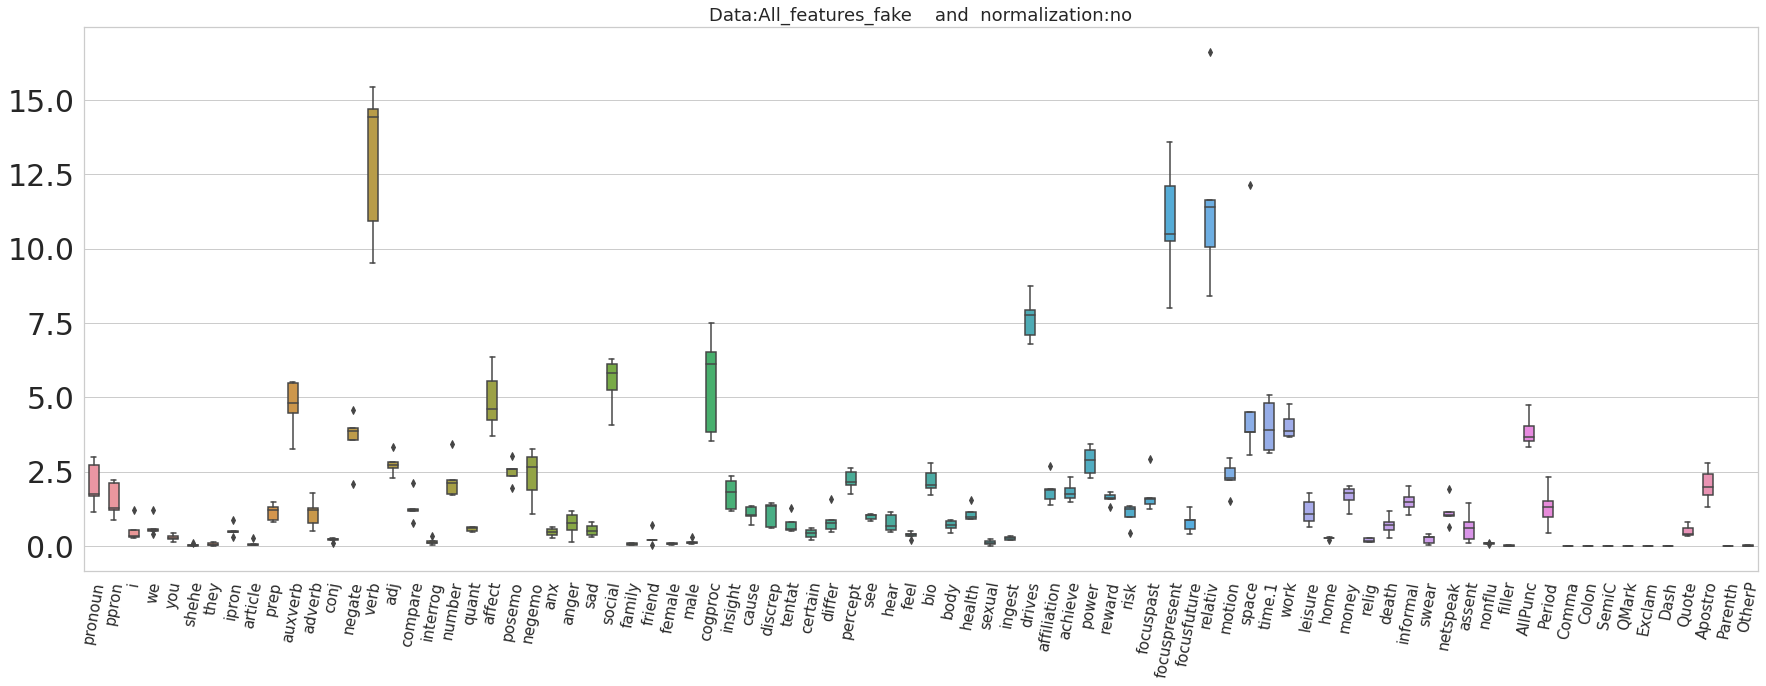

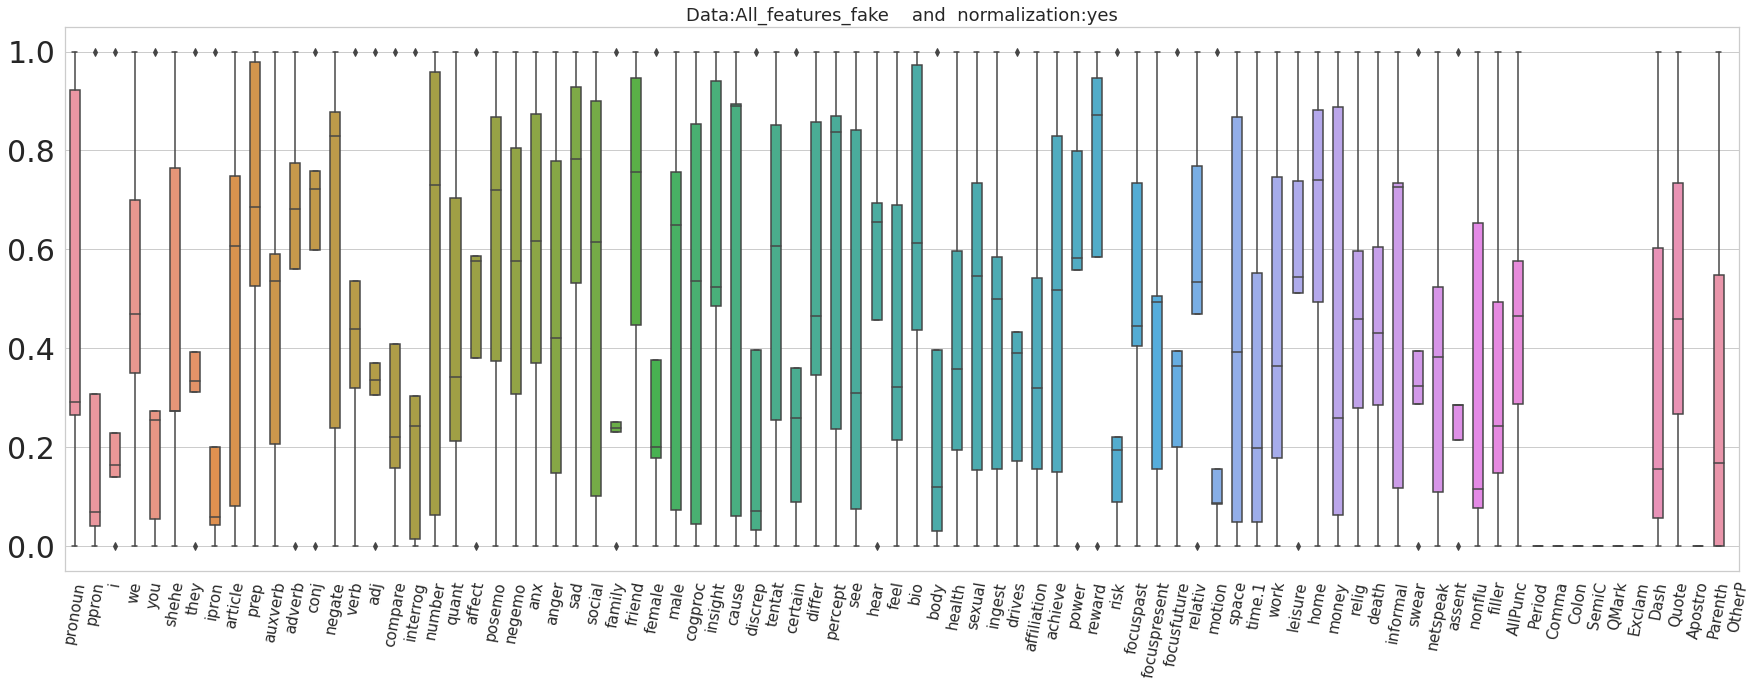

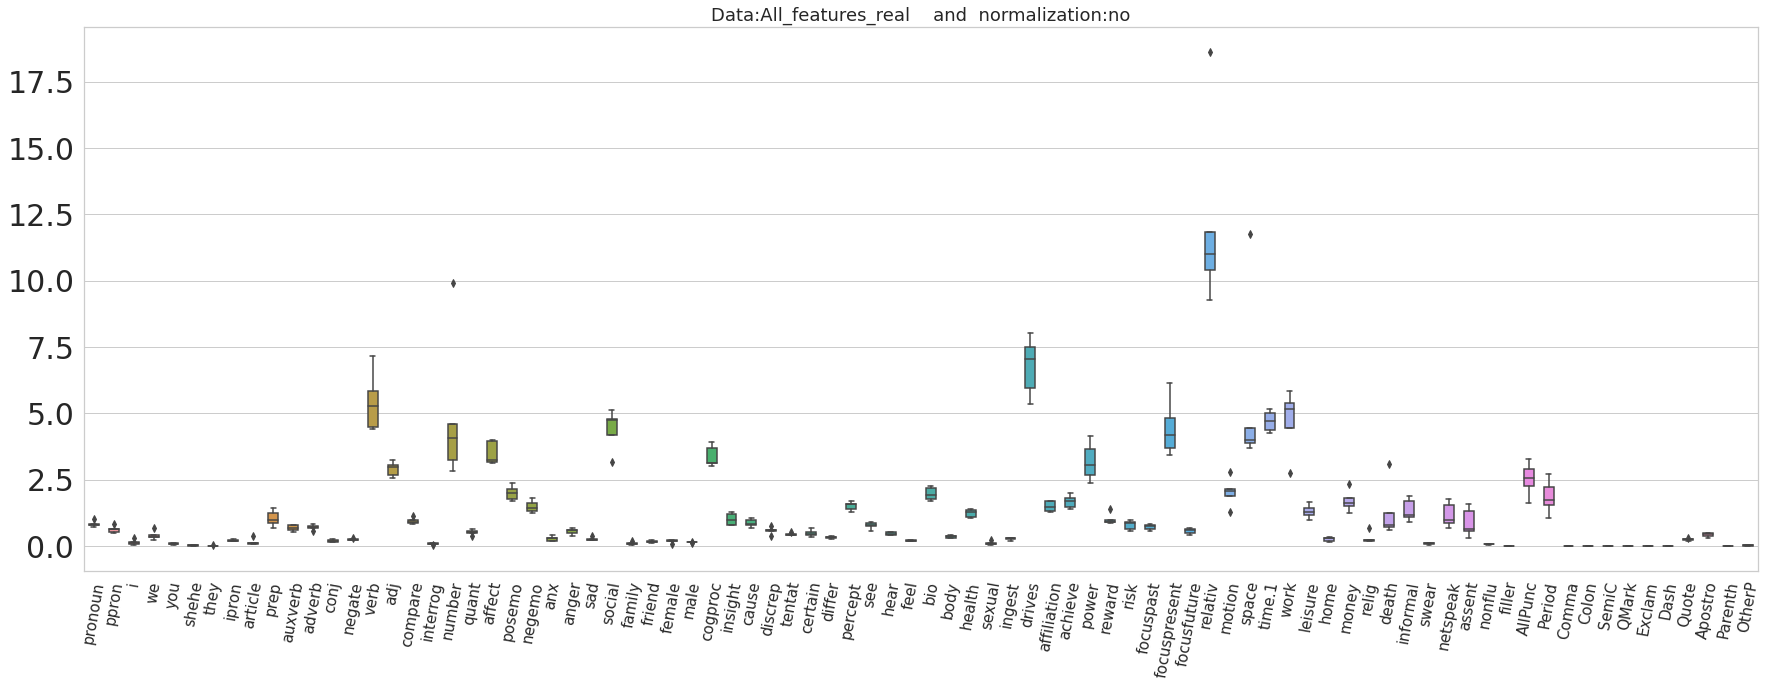

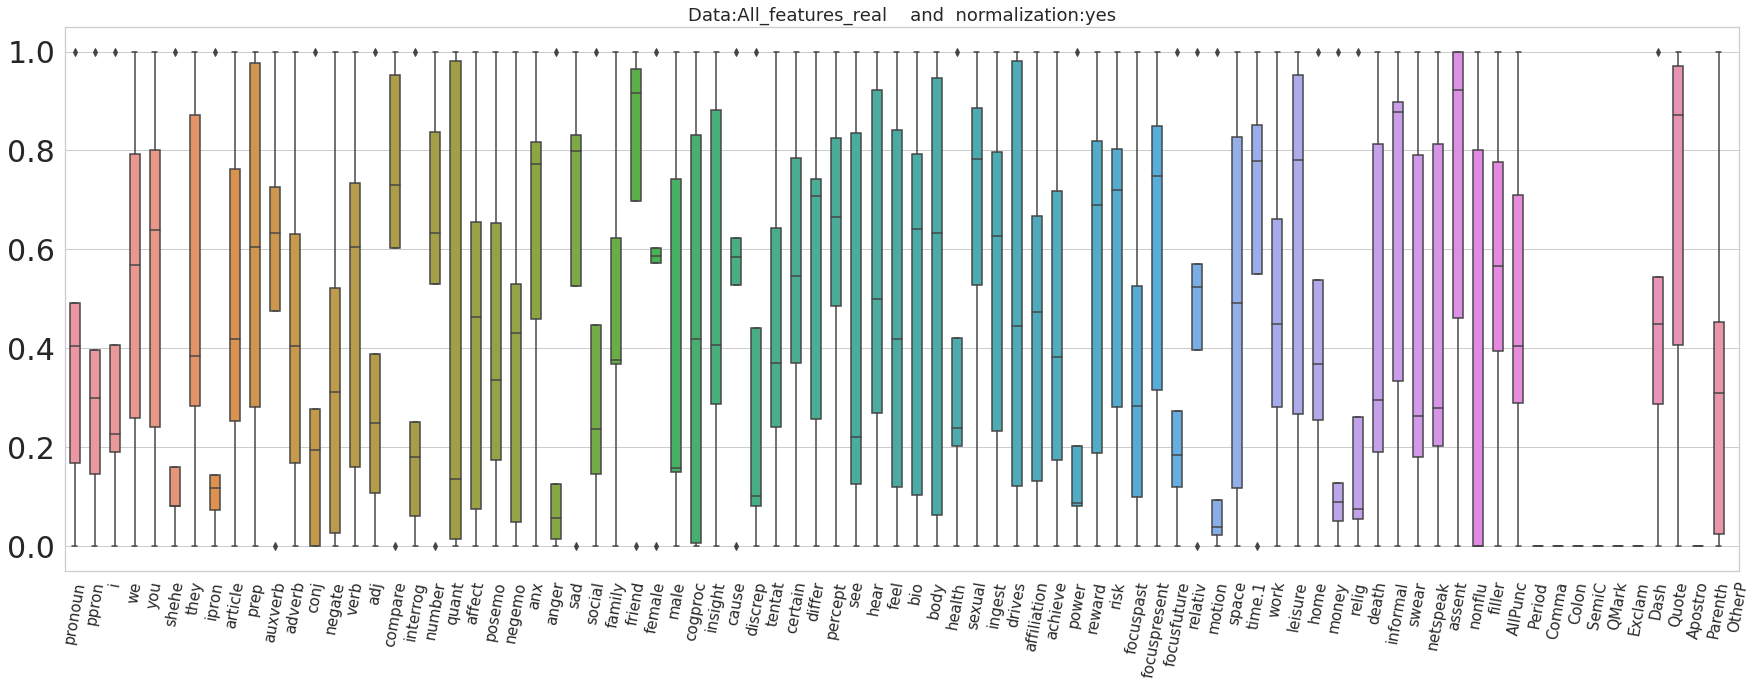

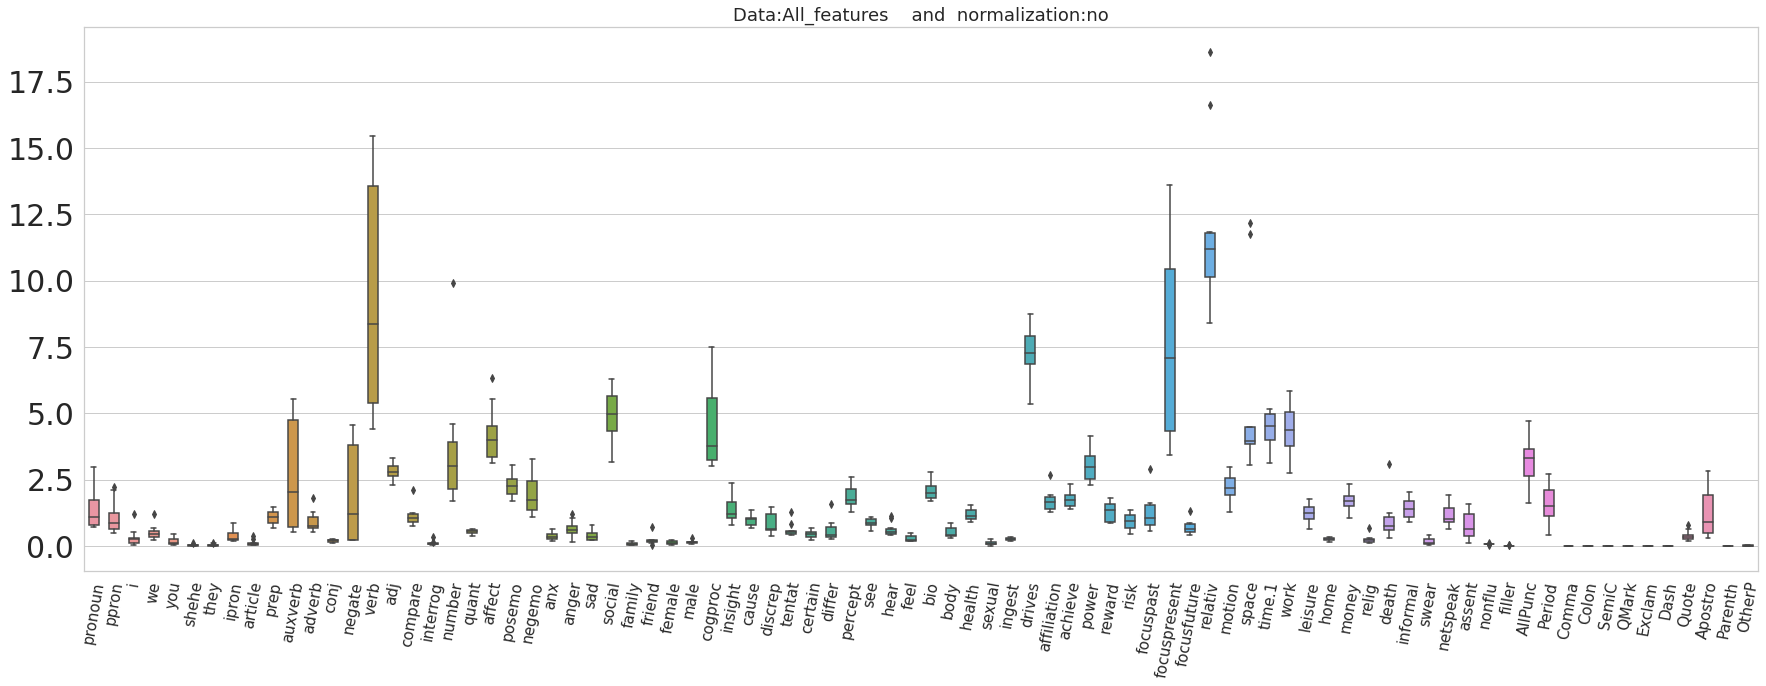

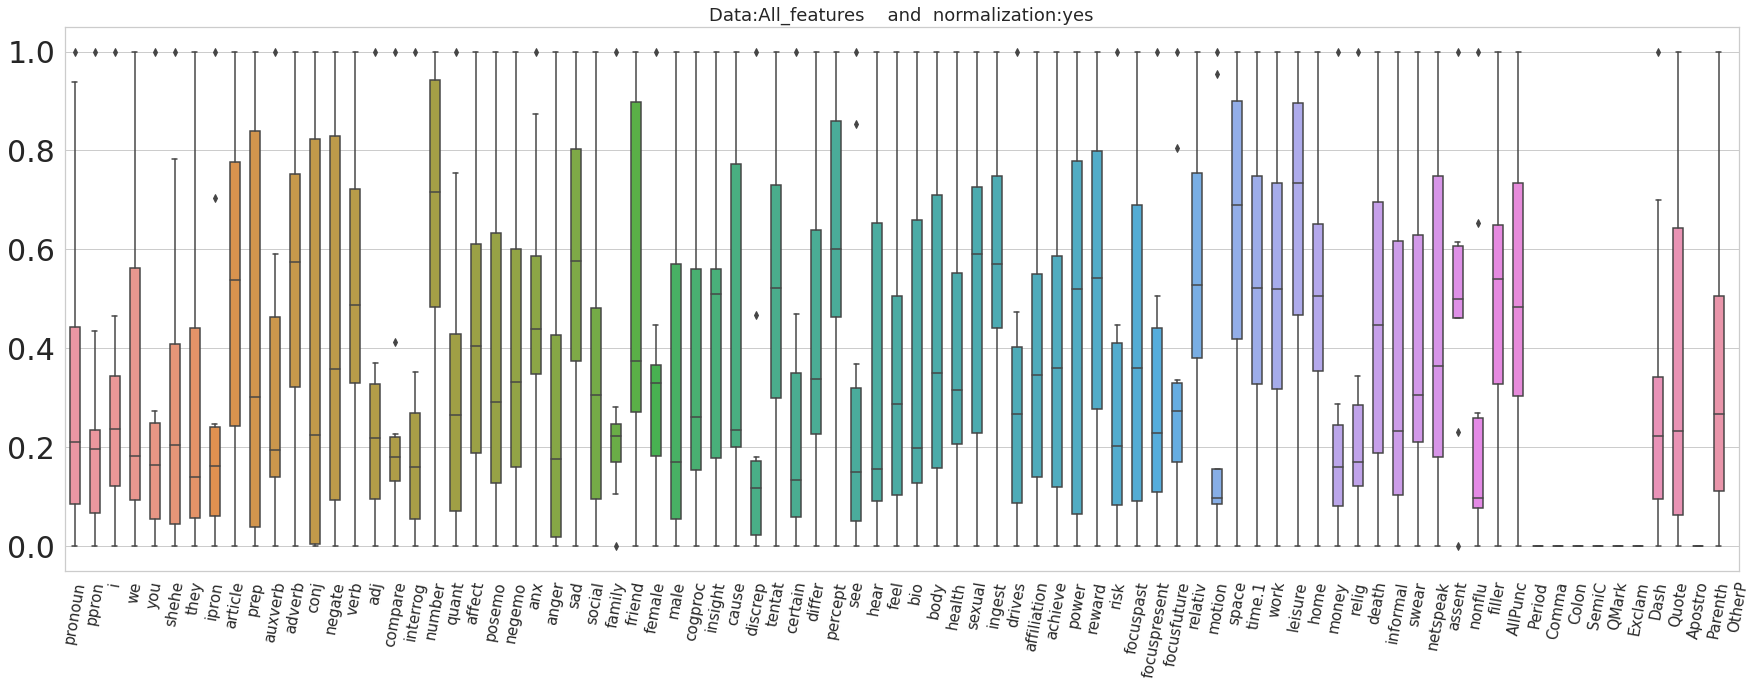

In [ ]:
DAAta=[All_features_fake,All_features_real,All_features]
DAAta_index=['All_features_fake','All_features_real','All_features']
Normalization=['no','yes']

for i in range(len(DAAta)):
     for j in range(len(Normalization)):
               Boxplot(DAAta[i],DAAta_index[i],normalization=Normalization[j]) 

Norm_plot

In [ ]:
from pylab import *
def Norm_plot(data):
   fig, ax = plt.subplots()
   sns.set(rc={"figure.figsize": (40*2, 40*2.5)})
   for i in range(data.shape[1]):
        subplot(10,10,i+1)
        ax=sns.distplot(data[data.columns[i]])
        plt.xlabel(data.columns[i],fontsize=40) 
        plt.ylabel('Density' ,fontsize=40) 

In [ ]:
DAAta=[All_features_fake,All_features_real,All_features]
DAAta_index=['All_features_fake','All_features_real','All_features']
    
for i in range(len(DAAta)):
      Norm_plot(DAAta[i])

 Eigen values

In [ ]:
All_features_fake


,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time.1,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
Australia_real,1824.7,70.403,54.851,17.208,24.977,1824.7,34.302,44.795,10.328,2.727,2.214,0.539,1.195,0.439,0,0.038,0.514,0.036,0.862,5.482,1.791,0.236,3.964,14.713,2.608,0.756,0.1,1.706,0.489,5.552,2.57,2.975,0.644,1.051,0.793,6.125,0.104,0.199,0.089,0.103,...,0.97,0.147,0.184,7.939,1.928,1.945,3.231,1.808,0.973,2.906,10.496,1.311,11.652,2.961,4.487,4.812,3.655,0.849,0.303,1.777,0.117,0.688,1.637,0.405,1.039,0.617,0.08,0.002,4.725,1.301,0,0,0,0,0.0,0.0,0.617,2.803,0.0,0.007
Singapour_real,1510,72.283,55.783,13.839,49.173,1510,30.9,38.691,7.533,2.978,2.108,1.191,0.504,0.346,0.028,0.038,0.87,0.263,1.474,3.274,0.77,0.22,2.093,10.939,2.276,1.207,0.337,3.418,0.625,3.682,2.581,1.075,0.249,0.139,0.362,5.802,0.041,0.193,0.052,0.098,...,0.894,0.002,0.294,7.093,1.872,2.331,2.287,1.707,0.433,1.617,10.264,0.854,10.054,2.199,3.846,3.888,4.779,1.77,0.258,1.061,0.127,0.277,2.025,0.039,1.908,1.455,0.08,0,4.022,2.316,0,0,0,0,0.0,0.0,0.408,1.296,0.0,0.000
SouthKorea_real,1146.2,80.528,50.524,33.852,38.387,1146.2,35.249,44.616,7.202,1.149,0.864,0.25,0.392,0.13,0.006,0.09,0.284,0.07,1.307,4.458,0.504,0.102,3.571,9.522,3.318,2.102,0.033,2.224,0.48,4.248,2.354,1.894,0.567,0.526,0.287,4.082,0.034,0.04,0.019,0.058,...,0.913,0.089,0.334,6.786,1.36,1.756,2.458,1.586,1.356,1.254,8.009,0.41,16.628,1.525,12.153,3.128,3.878,0.65,0.279,2.027,0.261,0.811,1.322,0.082,1.128,0.808,0.072,0.003,3.542,1.513,0,0,0,0,0.0,0.0,0.335,1.697,0.0,0.000
UK_real,1794.2,76.661,52.551,10.884,16.953,1794.2,27.98,44.771,8.755,1.688,1.222,0.315,0.523,0.238,0.03,0.115,0.467,0.022,1.212,4.821,1.263,0.275,3.875,14.434,2.734,1.168,0.157,1.731,0.619,4.591,1.937,2.651,0.477,0.782,0.681,5.253,0.097,0.207,0.093,0.143,...,1.145,0.245,0.266,7.772,1.586,1.487,3.424,1.305,1.237,1.573,12.11,0.865,11.394,2.63,3.828,5.069,4.275,1.486,0.211,1.913,0.159,0.526,1.466,0.305,0.991,0.246,0.1,0.026,3.338,0.964,0,0,0,0,0.0,0.0,0.361,1.988,0.0,0.023
USA_real,1660,72.809,54.243,3.669,24.895,1660,27.859,44.981,9.141,1.735,1.257,0.287,0.576,0.275,0.11,0.009,0.48,0.032,0.808,5.528,1.195,0.199,4.562,15.441,2.835,1.255,0.081,2.121,0.586,6.34,3.035,3.263,0.37,1.183,0.5,6.28,0.077,0.707,0.075,0.284,...,1.527,0.049,0.207,8.758,2.67,1.619,2.875,1.598,1.307,1.402,13.599,0.551,8.405,2.293,3.065,3.22,3.71,1.058,0.261,1.537,0.279,1.171,1.042,0.308,0.622,0.097,0.078,0.017,3.673,0.422,0,0,0,0,0.0,0.0,0.803,2.404,0.0,0.042


In [ ]:
from numpy import linalg as LA
from scipy.linalg import svd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import cmath

def Range_values(All_features_fake):
     All_features_fake.index=range(All_features_fake.shape[0])
     All_features_fake=All_features_fake.drop(['Comma','Colon','SemiC','QMark','Exclam','Dash','Parenth'],axis=1)
     
     for i in range(All_features_fake.shape[1]):
         All_features_fake[All_features_fake.columns[i]]=pd.to_numeric(All_features_fake[All_features_fake.columns[i]],errors='coerce')
     New_scale=All_features_fake.apply(zscore)
     print('#########################       Mean values            #################################')
     print('Mean:\n',np.mean(New_scale))
     print('#########################       Variance values            #################################')
     print('Variance:\n',np.var(New_scale))
     print('#########################       Eigen values            #################################')
     A=New_scale.corr()
     A=A.fillna(0)
     W, U=LA.eig(A)
     for i in range(len(W.real)):
        if round(W.real[i],2) >=0.01:
           print(i,'th eigenvalue is equalt to',round(W.real[i],2))          
     #idx = np.argsort(-W)
     #W = W[idx]
     #U = U[:,idx]
     print('#########################       singular values          #################################')
     U1, S, V = svd(New_scale.fillna(0), full_matrices=False)
     for i in range(len(S.real)):
        if round(S.real[i],2) >=0.01:
           print(i,'th singular is equalt to',round(S.real[i],2))

In [ ]:
DAAta=[All_features_fake,All_features_real,All_features]
DAAta_index=['All_features_fake','All_features_real','All_features']
    
for i in range(len(DAAta)):
     print('#########################\n')
     print('Data:',DAAta_index[i],'\n')
     Range_values(DAAta[i])

#########################

Data: All_features_fake 

#########################       Mean values            #################################
Mean:
 WC           1.887379e-16
Analytic    -1.543210e-15
Clout       -3.053113e-15
Authentic   -8.881784e-17
Tone        -3.996803e-16
                 ...     
AllPunc     -5.440093e-16
Period       1.332268e-16
Quote        0.000000e+00
Apostro     -5.329071e-16
OtherP      -4.440892e-17
Length: 86, dtype: float64
#########################       Variance values            #################################
Variance:
 WC           1.0
Analytic     1.0
Clout        1.0
Authentic    1.0
Tone         1.0
            ... 
AllPunc      1.0
Period       1.0
Quote        1.0
Apostro      1.0
OtherP       1.0
Length: 86, dtype: float64
#########################       Eigen values            #################################
0 th eigenvalue is equalt to 37.76
1 th eigenvalue is equalt to 23.33
2 th eigenvalue is equalt to 10.67
3 th eigenvalue is equalt

#World Map

Data:https://www.worldometers.info/coronavirus/

In [ ]:
COvid_info = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/0- Data/Covid_Info.xlsx')
Country_code=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/0- Data/Country_Code.xlsx')
COvid_info=COvid_info.merge(Country_code, on='Country or Area')
COvid_info.head(7)

,Country or Area,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious Critical,1M pop,Death/ 1M pop,Total Tests,Test/1M pop,Population,M49 code,ISO-alpha
0,United States of America,34242866,613052.0,28220863.0,5408951.0,5134.0,102888.0,1842.0,490322734.0,1473246.0,3.328179e+08,840,USA
1,India,29088176,353557.0,27496198.0,1238421.0,8944.0,20886.0,254.0,368207596.0,264388.0,1.392679e+09,356,IND
2,Brazil,17038260,477307.0,15494071.0,1066882.0,8318.0,79628.0,2231.0,50028915.0,233811.0,2.139720e+08,76,BRA
3,France,5719937,110137.0,5442999.0,166801.0,2394.0,87449.0,1684.0,87573848.0,1338871.0,6.540872e+07,250,FRA
4,Turkey,5300236,48341.0,5173186.0,78709.0,1044.0,62219.0,567.0,55899143.0,656196.0,8.518666e+07,792,TUR
5,Russian Federation,5145843,124496.0,4752085.0,269262.0,2300.0,35247.0,853.0,140800000.0,964429.0,1.459931e+08,643,RUS
6,United Kingdom of Great Britain and Northern I...,4528442,127854.0,4279393.0,121195.0,148.0,66380.0,1874.0,190228925.0,2788480.0,6.821957e+07,826,GBR


In [ ]:
import plotly.express as px

#df = px.data.gapminder().query("year==2007")
fig = px.choropleth(COvid_info, locations="ISO-alpha",
                    color="Total Deaths", # lifeExp is a column of gapminder
                    #width=1000, height=1000,
                    hover_name="Country or Area", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    #title='Figure 2: Change in Turnout from 2016 to 2020',
                    #mapbox_style="carto-positron",
                    #zoom=2,
                    #center = {"lat": 37.0902, "lon": 10.7129},
                    #opacity=0.75,
                    #labels={'Total Cases':'Total Cases'} 
                    )
fig.update_layout(margin={"r":400,"t":0,"l":0,"b":5},font=dict(size=40),)
fig.show()


In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import plotly.express as px

In [ ]:
fig = px.choropleth(Loss, geojson=counties, locations='FIPS County Code', color='Deaths involving COVID-19',
                           color_continuous_scale="Viridis",
                           range_color=(0, 6501),
                           scope="usa",
                           #labels={'Deaths from All Causes':'Deaths from All Causes'}
                          labels={'Deaths involving COVID-19':'Deaths involving COVID-19'}         
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()